In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [2]:
df1 = pd.read_csv("./dataSet/0401_UkraineCombinedTweetsDeduped.csv")
df1 = df1.iloc[:, 1:]
df1.head()

/Users/tegochang/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


In [3]:
df1.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts'],
      dtype='object')

In [4]:
for word in df1.text[:1]:
    print(word, end='')

⚡The Ukrainian Air Force would like to address misinformation published in multiple Western media outlets regarding the situation in the 🇺🇦 sky and support from our @NATO allies. 
More in 🧵(1/16)
#ProtectUАSky #StopRussia #UkraineUnderAttaсk

In [5]:
df2 = pd.read_csv("./dataSet/UkraineCombinedTweetsDeduped20220227-131611.csv")
df2 = df2.iloc[:, 1:]
df2.head()

/Users/tegochang/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,962369743,toonspt_,พยรลก 😉\nจะเปิดแอคเมื่อขายของเท่านั้น!!,NaN,462,7,20549,2012-11-21 13:01:19.000000,1496738675085897729,2022-02-24 06:48:02.000000,1897,Footage of the airport bombing in Ivano-Franki...,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t...",en,NaN,0,2022-02-24 06:51:34.430620
1,865846412755353600,SabrinaBbsmith,อ้ายคือปริญญาใจน้องจึงยิ้มได้วันนี้ #สมรสเท่าเ...,Just go for it,385,503,84016,2017-05-20 08:27:26.000000,1496738675140538368,2022-02-24 06:48:02.000000,3534,12.37 น. เจมส์ วอเตอร์เฮาส์ ผู้สื่อข่าว BBC ใน...,[],th,NaN,0,2022-02-24 06:51:34.421428
2,1927022036,haleggwenn,"Mathe & Kulturanthropologie • Feminismus, Anti...","Göttingen, Germany",251,51,78,2013-10-02 14:19:01.000000,1496738675522248706,2022-02-24 06:48:02.000000,0,"Die Rede von #Putin ist echt gruselig:\n""Russl...","[{'text': 'Putin', 'indices': [13, 19]}, {'tex...",de,NaN,0,2022-02-24 06:51:34.412324
3,1073676020,IndiaTodayFLASH,No dragging feet on news. Crisp & short news s...,NaN,117,1152610,589066,2013-01-09 12:46:38.000000,1496738675584954371,2022-02-24 06:48:02.000000,18,Ukraine MP Sophia Fedyna tells about the groun...,"[{'text': 'ITVideo', 'indices': [130, 138]}]",en,NaN,0,2022-02-24 06:51:34.403108
4,1484119658488033281,sandsand_fight,NaN,NaN,128,3,691,2022-01-20 11:05:01.000000,1496738675710857224,2022-02-24 06:48:03.000000,3974,รัสเซียยิงขีปนาวุธรัวๆไปยังยูเครน\n#รัสเซียยูเ...,"[{'text': 'รัสเซียยูเครน', 'indices': [50, 64]...",th,NaN,0,2022-02-24 06:51:34.393984


In [6]:
df2.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts'],
      dtype='object')

# Data Preprocessing

In [7]:
# See the vocabulary 
word_counts = CountVectorizer()
word_counts.fit(df1.text.to_numpy())

CountVectorizer()

In [8]:
print (word_counts.get_feature_names_out().shape)
word_counts.get_feature_names_out()[100000:100005]

(288033,)


array(['hera8585', 'herab', 'herald', 'heralding', 'heraldo'],
      dtype=object)

In [9]:
# Check the mapping of terms to feature indices
vocab = word_counts.vocabulary_
vocab

{'the': 212406,
 'ukrainian': 221751,
 'air': 22323,
 'force': 84824,
 'would': 238519,
 'like': 130828,
 'to': 214698,
 'address': 20471,
 'misinformation': 142267,
 'published': 174357,
 'in': 107895,
 'multiple': 145628,
 'western': 235953,
 'media': 138994,
 'outlets': 161015,
 'regarding': 182800,
 'situation': 198872,
 'sky': 199370,
 'and': 25369,
 'support': 206802,
 'from': 86618,
 'our': 160923,
 'nato': 148508,
 'allies': 23867,
 'more': 144157,
 '16': 2382,
 'protectuаsky': 173175,
 'stoprussia': 204961,
 'ukraineunderattaсk': 221709,
 'chernihiv': 48630,
 'oblast': 155829,
 'ukrainians': 221847,
 'welcome': 235681,
 'their': 212690,
 'liberators': 130417,
 'russianinvasion': 189625,
 'standwithukraine': 203773,
 'ukraineunderattack': 221707,
 'ukrainewillwin': 221739,
 'putinisawarcriminal': 174952,
 'stopputin': 204930,
 'russianukrainianwar': 189775,
 'russiagohome': 189437,
 'россиясмотри': 266201,
 'нетвойне': 262491,
 'https': 103134,
 'co': 51199,
 '86ixyuetnb': 1480

In [10]:
vocab = dict(sorted(vocab.items(), key=lambda item: item[1]))
print("Total vocab in the data set:", len(vocab))
vocab

Total vocab in the data set: 288033


{'00': 0,
 '000': 1,
 '0000': 2,
 '00000': 3,
 '000000': 4,
 '0000000000000000000000000000000000000000': 5,
 '0000000017': 6,
 '000008': 7,
 '0000260472': 8,
 '0000260917': 9,
 '0000261721': 10,
 '0000297702': 11,
 '0000299277': 12,
 '0000299987': 13,
 '0001': 14,
 '00011007': 15,
 '00012297': 16,
 '00012736': 17,
 '0002': 18,
 '0005': 19,
 '000981': 20,
 '000982': 21,
 '000983': 22,
 '000985': 23,
 '000996': 24,
 '000ck96lh5': 25,
 '000den': 26,
 '000e': 27,
 '000en': 28,
 '000fun0lwz': 29,
 '000kg': 30,
 '000km': 31,
 '000mill': 32,
 '000mt': 33,
 '000s': 34,
 '000star': 35,
 '000th': 36,
 '000tl': 37,
 '000usd': 38,
 '000women': 39,
 '000x': 40,
 '000個の余剰ヘルメットを2週間以内にウクライナ軍に輸送という': 41,
 '000個の余剰ヘルメットを分類': 42,
 '000個を処理': 43,
 '000円': 44,
 '000개': 45,
 '001': 46,
 '001001': 47,
 '001002': 48,
 '001008': 49,
 '001009': 50,
 '001011': 51,
 '001012': 52,
 '001013': 53,
 '001015': 54,
 '001018': 55,
 '001020': 56,
 '001024': 57,
 '001025': 58,
 '001027': 59,
 '001033': 60,
 '001040': 61,


### Spliting the dataset

In [11]:
df_train, df_valid = train_test_split(df1, train_size=0.8, random_state=1234)
df_valid, df_test = train_test_split(df_valid, train_size=0.5, random_state=1234)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(291900, 17)
(36487, 17)
(36488, 17)


### Vectorization

In [12]:
# Create tf-idf vectorizer with limited vocab:
tf_idf = TfidfVectorizer(max_features=20_000)
tf_idf.fit(df_train.text.to_numpy())

TfidfVectorizer(max_features=20000)

In [13]:
# Transform text to vectors:
X_train = tf_idf.transform(df_train.text.to_numpy())
X_valid = tf_idf.transform(df_valid.text.to_numpy())
X_test = tf_idf.transform(df_test.text.to_numpy())

# y_train = train_df.iloc[:, -1].to_numpy()
# y_valid = valid_df.iloc[:, -1].to_numpy()
# y_test = test_df.iloc[:, -1].to_numpy()

print(X_train.shape, X_valid.shape, X_test.shape)
# print(y_train.shape, y_valid.shape, y_test.shape)

(291900, 20000) (36487, 20000) (36488, 20000)


##### Visualizae the TF-IDF Matrix

In [14]:
text_data = df_train.text.values.tolist()
print(text_data[1])

"Pareciera que la UE es frágil o perdió la memoria hace rato, de tanto ver película yankis, todavía creen que fue EUA quien los liberó de los nazis, manga de desagradecidos"

Ubiquense‼️

Fue #Rusia #Russia 🇷🇺 https://t.co/6L80942meN


In [15]:
#Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True: removes punctuations

In [16]:
data_words = list(sent_to_words(text_data))

In [17]:
data_words[:1]

[['free',
  'nft',
  'giveaway',
  'to',
  'win',
  'follow',
  'boredapesec',
  'like',
  'amp',
  'rt',
  'pinned',
  'drop',
  'your',
  'eth',
  'wallet',
  'winner',
  'picked',
  'before',
  'the',
  'xbaec',
  'airdrop',
  'nftcommunity',
  'nftcollectors',
  'nftartist',
  'nftart',
  'nftproject',
  'nftgiveaways',
  'nfts',
  'https',
  'co',
  'epqvwdqqz']]

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Term Document Frequency (converted from document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples)
corpus = [id2word.doc2bow(data_word) for data_word in data_words]

In [1]:
# feature_names = tf_idf.get_feature_names()
# corpus_index = [n for n in corpus]

# df_tdidf = pd.DataFrame(X_train.T.todense(), index=feature_names, columns=corpus_index)
# print(df_tdidf)

# Sentiment Analysis

In [19]:
df1

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364870,377139026,Angelocsn,"conseiller en droit du travail, aime la musiqu...","rive sud, Montréal",2594,2309,40959,2011-09-21 02:40:07.000000,1510044327510265863,2022-04-01 23:59:57.000000,0,@montreal110 @femeninna je trouve plutôt terri...,"[{'text': 'impuissance', 'indices': [81, 93]},...",fr,NaN,0,2022-04-02 00:13:16.247799
364871,1054170412194553857,TribalHawk1,NaN,East Los Angeles,207,29,9045,2018-10-22 00:39:46.000000,1510044329993138176,2022-04-01 23:59:58.000000,0,“From where Winston stood it was just possible...,"[{'text': 'Ukraine', 'indices': [218, 226]}]",en,NaN,0,2022-04-02 00:13:16.239719
364872,40997579,ljall00,Democrat. This is a country of laws for everyo...,"Scottsdale, AZ",5336,4898,162426,2009-05-18 23:21:35.000000,1510044330085347328,2022-04-01 23:59:58.000000,2264,When I said tonight in front of 3000 people In...,[],en,NaN,0,2022-04-02 00:46:46.527353
364873,376000049,SaverioVivas2,Corresponsal de PDC (@Punto_DeCorte) en Colomb...,Colombia,8218,8789,37666,2011-09-19 03:47:15.000000,1510044333533184005,2022-04-01 23:59:59.000000,0,#1Abr #Ucrania \nVídeo de los helicópteros ucr...,"[{'text': '1Abr', 'indices': [0, 5]}, {'text':...",es,NaN,0,2022-04-02 00:04:42.165753


In [23]:
import math

# oneFifth = math.ceil(len(df1) * 0.05)
numSample = math.ceil(len(df1) * 0.01)

In [24]:
df1_sample = df1[df1["language"] == "en"].sample(numSample)

In [25]:
df1_sample.shape

(3649, 17)

In [26]:
df1_sample.reset_index(drop=True, inplace=True)
df1_sample

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,12758072,andymok,From inside the Beltway to Beijing - Decoding ...,"Beijing, China",8053,10355,20915,2008-01-27 19:24:18.000000,1509871457190350848,2022-04-01 12:33:02.000000,2,March 30 #geopolitics interview on #China #Ind...,"[{'text': 'geopolitics', 'indices': [28, 40]},...",en,NaN,0,2022-04-01 12:41:22.386298
1,19393766,jjj5819,NaN,"New York, USA",5001,2879,896636,2009-01-23 13:30:26.000000,1509971679354761228,2022-04-01 19:11:16.000000,37,⚡️ Thanks to the agreements reached in #Turkey...,"[{'text': 'Turkey', 'indices': [58, 65]}, {'te...",en,NaN,0,2022-04-01 19:31:08.101495
2,1225793633342935043,VippusaO,NON-VOTERS ARE UNDEFEATED. THEY'VE WON EVERY E...,USA,4676,6886,652052,2020-02-07 14:49:27.000000,1509853192212959251,2022-04-01 11:20:27.000000,0,RUSSIANS DESTROY A MILITARY SCHOOL IN #UKRAINE...,"[{'text': 'UKRAINE', 'indices': [38, 46]}]",en,NaN,0,2022-04-01 11:30:31.760916
3,860580934919360513,RamlochunLucy,Be kind. Animals matter. Laughter helps! (Alon...,"Ventnor, England",1570,909,54790,2017-05-05 19:44:18.000000,1509856310807961601,2022-04-01 11:32:50.000000,87,"Thanks to investigative journalists, we know w...",[],en,NaN,0,2022-04-01 12:01:15.741830
4,807347090665906177,tomek_wyszynski,"✝️🇵🇱💯 Nigdy z królami nie będziem w aljansach,...",NaN,1444,1397,154371,2016-12-09 22:12:00.000000,1509776537654022168,2022-04-01 06:15:51.000000,1699,❌Myth: The US and @NATO are providing #Ukraine...,"[{'text': 'Ukraine', 'indices': [50, 58]}]",en,NaN,0,2022-04-01 06:25:15.703292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,47210952,Mike_Sammon,"Husband, father. Low carbon heating engineer. ...","Southport, UK",4300,1689,6809,2009-06-15 00:10:33.000000,1510023365125410827,2022-04-01 22:36:39.000000,2696,❌Myth: The US and @NATO are providing #Ukraine...,"[{'text': 'Ukraine', 'indices': [50, 58]}]",en,NaN,0,2022-04-01 22:46:43.280832
3645,127530923,Romhai_H,"𝑾𝒉𝒆𝒏 𝒊𝒏𝒋𝒖𝒔𝒕𝒊𝒄𝒆 𝒃𝒆𝒄𝒐𝒎𝒆𝒔 𝒍𝒂𝒘, 𝒓𝒆𝒔𝒊𝒔𝒕𝒂𝒏𝒄𝒆 𝒃𝒆𝒄𝒐𝒎𝒆𝒔...",NaN,679,833,153084,2010-03-29 14:14:00.000000,1509808048109502484,2022-04-01 08:21:04.000000,72,"As the world focuses on #Ukraine, we urge UN m...","[{'text': 'Ukraine', 'indices': [43, 51]}]",en,NaN,0,2022-04-01 08:30:00.262390
3646,1402258692326760448,lordnemo6,NaN,NaN,65,1,1085,2021-06-08 13:40:51.000000,1509866599108521984,2022-04-01 12:13:43.000000,181,And here are the first photo from the liberate...,"[{'text': 'Ivankov', 'indices': [73, 81]}, {'t...",en,NaN,0,2022-04-01 12:15:03.968243
3647,1212333512495288321,GeezaNews,Sport &\nBolton Wanderers. \nUAP/UFO phenomeno...,"North West, England",1872,828,15953,2020-01-01 11:23:46.000000,1509885339103543298,2022-04-01 13:28:11.000000,58,#NewsMap \nThe Ukrainian army is back in #Ivan...,"[{'text': 'NewsMap', 'indices': [19, 27]}, {'t...",en,NaN,0,2022-04-01 13:30:36.943991


### Data Preprocessing

In [27]:
import re
from bs4 import BeautifulSoup
from html import unescape

In [28]:
# Removing URLs
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [29]:
# Unescaping characters
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [30]:
# Removing emoji
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [31]:
# Reduce consecutive whitespaces into one
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [32]:
# Remove unwanted symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [34]:
# conduct data preprocessing
df1_sample['text'] = df1_sample['text'].str.lower()
df1_sample['text'] = df1_sample['text'].apply(remove_urls)
df1_sample['text'] = df1_sample['text'].apply(unescape_stuff)
df1_sample['text'] = df1_sample['text'].apply(deEmojify)
df1_sample['text'] = df1_sample['text'].apply(remove_symbols)
df1_sample['text'] = df1_sample['text'].apply(unify_whitespaces)

/Users/tegochang/opt/miniconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [35]:
df1_sample['text'].head()

0    march 30 geopolitics interview on china india ...
1     thanks to the agreements reached in turkey, t...
2    russians destroy a military school in ukraine ...
3    thanks to investigative journalists, we know w...
4     myth the us and nato are providing ukraine wi...
Name: text, dtype: object

### Flair for Sentiment Analysis

Install flair then suppress the status messages

In [37]:
%%capture
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

In [38]:
# creare a helper function to apply flair for sentiment prediction

In [60]:
def flair_prediction(x):

    sentence = Sentence(x)
    
    try:        
        sia.predict(sentence)
        score = sentence.labels[0]
        staging_score = str(score).replace("(",",").replace(")","")
        
        sentiment_score = staging_score.split(",")
#         print (sentiment_score)
        
        if "POSITIVE" in str(sentiment_score[0]):
#             return sentiment_score[0].strip(), float(sentiment_score[1].strip())
            return "POSITIVE", float(sentiment_score[1].strip())
        elif "NEGATIVE" in str(sentiment_score[0]):
#             return sentiment_score[0].strip(), float(sentiment_score[1].strip())
            return "NEGATIVE", float(sentiment_score[1].strip())
        else:
            return "NEUTRAL", 0.00
    except Exception:
        print(sentence)
        pass  # or you could use 'continue'
    
    return "ERROR",0.00

In [59]:
# # debug

# testList = ['Sentence: "anonymous leaks free information for all lipetsk mechanical plant produces defense products . production and sale of weapons and military equipment ', '.. . download oprussia ukraine freeukraine standwithukraine slavaukraini" → NEGATIVE ', '0.9927']
# testList[0].strip()

'Sentence: "anonymous leaks free information for all lipetsk mechanical plant produces defense products . production and sale of weapons and military equipment'

In [40]:
df1_sample['Sentiment'] = ""
df1_sample['Sentiment_Score'] = np.nan

Install swifter and suppress the status

In [41]:
%%capture
!pip install swifter

In [50]:
# df1_sample_debug = df1_sample.sample(100)

In [66]:
# determine the sentiment

import swifter
df1_sample["Sentiment"],df1_sample["Sentiment_Score"] =  zip(*df1_sample["text"].swifter.apply(flair_prediction))
# df1_sample_debug["Sentiment"],df1_sample_debug["Sentiment_Score"] =  zip(*df1_sample_debug["text"].swifter.apply(flair_prediction))

Pandas Apply:   0%|          | 0/3649 [00:00<?, ?it/s]

['Sentence: "march 30 geopolitics interview on china india brazil southafrica rejecting u.s. ', ' eu ', ' western sanctions on russia for invading ukraine chidu77 andymok gilsonschwartz" → NEGATIVE ', '0.9964']
['Sentence: "thanks to the agreements reached in turkey ', ' today ', ' ukraine accomplished a successful exchange of prisoners of war . we ve managed to bring back 86 of our servicemen ', ' 15 of them women . the state will fight to the end for each of our citizens ! stoprussia stopputin" → NEGATIVE ', '0.5749']
['Sentence: "russians destroy a military school in ukraine this is the current scene in sumy ', ' ukraine 05" → NEGATIVE ', '0.9829']
['Sentence: "thanks to investigative journalists ', ' we know which political parties received russian money . as a rule of thumb ', ' the more anti eu ', ' the higher the chances the party received russian money . here example 4 russia ukraine rejoin brexit putin resist eu" → NEGATIVE ', '0.9994']
['Sentence: "myth the us and nato are pr

['Sentence: "ukraine the ukrainian forces continue implementation of improvised explosive devices in combat ', ' much like the middle east . this time a russian fuel truck was hit by an ied ', ' which led to its complete destruction ." → NEGATIVE ', '0.9387']
['Sentence: "elintnews live shot of ukrainian attack helicopters striking oil facility in belgorod ', ' across the border inside russia . ukrainewar belgorod ukraine" → POSITIVE ', '0.9633']
['Sentence: "myth the us and nato are providing ukraine with needed weapons . allies are doing everything possible ', ' short of direct involvement in the war . truth to date ', ' our allies have not answered our call for air defense support fighter jets and sam . 11 16" → NEGATIVE ', '0.9105']
['Sentence: "carolecadwalla a very important thread . please retweet . more than ever it s patently obvious to me what s been going on over the past decade but much longer in reality . we need to grow as a community to challenge this gov . happy friday 

['Sentence: "mfa expresses its protest against conscription conducted by russia in the autonomous republic of crimea and in the city of sevastopol ', ' as well as against mobilization to russian military service of ukrainian citizens living on the temporarily occupied territories . ukraine" → NEGATIVE ', '0.9206']
['Sentence: "russiaukraine former commander of the azov battalion ', ' maxim zhorin photographed a few days ago with one of the mi 8 helicopters that were shot down ." → NEGATIVE ', '0.9785']
['Sentence: "witchhusband davicarefree footyfansviews footballgrounds salmanchelsea eds100 birdflu 7 keith as usual linzinatasha hughesy chris losriley jaysuscenko danielh lufc omicdaz oyellows fsfcuk all hi happyfriday please click to followme i follow back ifb f4f followback love 1ddrive teamstallion strongertogether dinast amilenials resist vote srkplus no ww3 peace influencer ai" → POSITIVE ', '0.9552']
['Sentence: "ukraine the ukrainian forces captured another very potent russian to

['Sentence: "volodymyr zelenskyy stripped two generals of their ranks the former heads of the ssu internal security directorate andrei naumov and the ssu directorate in kherson oblast serhiy krivoruchko were stripped of their ranks ." → NEGATIVE ', '0.9986']
['Sentence: "breaking us state department deny sending any threats to pm imrankhanpti or pakistan and says pm imrankhan allegations are false . us state department also denied any role of us govt in no confidence motion against pm imran khan ." → NEGATIVE ', '0.9973']
['Sentence: "hey ', ' mfa russia ', ' here is another ukrainian nationalist ! standwithukraine ukraineunderattack ukrainewillwin terrorussia putinisawarcriminal stopputin russianukrainianwar russiagohome" → NEGATIVE ', '0.9607']
['Sentence: "warcrimes kadyrovites a paramilitary organization from chechnya ', ' russia has started to cut off the heads of the ukraine soldiers in the azov area . ukraineunderattack" → NEGATIVE ', '0.9999']
['Sentence: "bopoverse minting is 

['Sentence: "so joebiden gives the green light to russia to put a pipeline into europe ', ' while denying the keystonepipeline ', ' and blames putin for our gas prices ?!! ! gtfoh" → NEGATIVE ', '0.9971']
['Sentence: "ua struggle russians fired on an evacuation bus carrying people from lysychansk . there were children inside . during the entire full scale offensive ', ' russia killed 148 children ', ' according to official figures alone . stoprussia ukrainerussiawar" → NEGATIVE ', '0.9996']
['Sentence: "russian foreign minister sergeylavrov was received by prime minister narendramodi during his official visit to india . russiaukrainewar ukrainerussianwar" → NEGATIVE ', '0.5207']
['Sentence: "dear ukrainian friends ', ' soon we will help you rebuild your cities and towns . we will continue to take care of your families who have been forced to flee ', ' until they can safely return . r stefanchuk standwithukraine" → POSITIVE ', '0.9964']
['Sentence: "ukraine has shown the world how to st

['Sentence: "2022 is bound to be monumental for isp we re proud to release technical and metaverse roadmaps check out our ambitious goals milestones" → POSITIVE ', '0.9971']
['Sentence: "ukraine a claimed withdrawing vdv convoy in kyiv oblast was attacked by ukrainian forces ', ' with 2 3 bmd 2 airborne infantry fighting vehicles completely destroyed . extremely gruesome scenes ." → NEGATIVE ', '0.9994']
['Sentence: "30 settlements in kyiv and chernigiv regions as well as all in sumy region are liberated from the russian army empr russiaukrainewar" → NEGATIVE ', '0.9883']
['Sentence: "basically it means pakistanarmy chief coas bajwa getting orders from amreeka white house absolutely yes gameoverik because you said absolutely no congratulations pakistan usa cpec russian visit" → NEGATIVE ', '0.9957']
['Sentence: "five weeks have passed since the beginning of the russian invasion of ukraine . today i examine the entry of russian mercenaries into the conflict ', ' based on my recent artic

['Sentence: "ukraine the first zsu 23 4 shilka self propelled anti aircraft gun was captured from the russian army by the ukrainian forces . pretty outdated piece of kit ." → NEGATIVE ', '1.0']
['Sentence: "ukraine a russian bmd 4m captured during fighting w of kyiv notice the damage ." → NEGATIVE ', '0.9996']
['Sentence: "nijiten matcha 4444 good morning . this is my nft friday work . fuck you putin . i hope you enjoy ', ' share and purchase this material . nfts nftart art ukraine stopwar fuckputin nftvideo" → POSITIVE ', '0.9245']
['Sentence: "second source on putin s deer antler blood baths" → POSITIVE ', '0.8537']
['Sentence: "new adventures of russian looters in ukraine they were taking home gifts stolen from ukrainian homes and stores children s toys ', ' frying pans ', ' bicycles and fishing rods ." → POSITIVE ', '0.5008']
['Sentence: "when i said tonight in front of 3000 people in sioux falls ', ' south dakota that zelenskyyua is a a badass ', ' the room erupted on thunderous a

['Sentence: "not only does india not comply with sanctions against russia ', ' it also spends billions of dollars a year on military hardware ', ' most of them from russia . at the same time ', ' it receives hundreds of millions of dollars in humanitarian aid from the west . standwithukraine" → NEGATIVE ', '0.9985']
['Sentence: "jukenft sedefka69947731 kayarmustafa21 mustafa211978 abdulahgokturk 0xb7599b0390cf7a0616bde6c69cff2f6bfe5b210b nftgiveaway nftgiveaways nftcommunity nftdrop nfts solananfts nft opensea nfts ukriane helpukraine" → POSITIVE ', '0.9855']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "the uk secretary for defence ben wallace bwallacemp changed his background photo on twitter to the photo of the soldiers of the ukrainian 28th infantry 

['Sentence: "irish jet lessor aercap makes 3.5bn insurance claim over russia aircraft aviation russiaukrainewar sanctions ireland" → NEGATIVE ', '0.8699']
['Sentence: "butcher of mariupol mikhail mizintsev !" → NEGATIVE ', '0.9974']
['Sentence: "young refugees draw their experience of fleeing the war in ukraine the washington post via googlenews preschool kids library covid19 stress fridaymotivation fridayfeeling reading prek teach ukraine ukrainewar earlychildlhoodedlearning" → POSITIVE ', '0.8238']
['Sentence: "demining on the kyiv warsaw highway" → POSITIVE ', '0.7741']
['Sentence: "satan is opposite from god . . he is unintelligent ', ' satan is so dumb that it makes you think that he is genious kremlinrussia e russia" → NEGATIVE ', '0.9996']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k

['Sentence: "biden seems willing to accept that there is going to be a massive increase in illegal immigration ', ' and he s unwilling to flip the narrative and say ', ' we re going to be like poland let in asylum seekers legally . it s incomprehensible politics to me. it guarantees losing" → NEGATIVE ', '0.7581']
['Sentence: "butcher of mariupol mikhail mizintsev !" → NEGATIVE ', '0.9974']
['Sentence: "ukraine s local governor said russian forces are withdrawing from chernihiv region in northern ', ' but have not left entirely . said it s too early for ukrainian forces in the chernihiv region to let their guard down ', ' as troops are still on our land ." → NEGATIVE ', '0.9518']
['Sentence: "i wan play world cup . see am ', ' play ghana davido wizkid putin rubles oil" → NEGATIVE ', '0.9977']
['Sentence: "to celebrate the release of our project ', ' we will be giving 50k assetnfts russia and ukraine peace to our community . follow ', ' rt tag 3 of your friends filling in form coinkit m

['Sentence: "considering it took 20 years to us for not winning in vietnam 11 yrs to sweden for not winning in afghanistan 8 yrs to saudis for same in yemen 8 yrs to uk for not winning hearts minds in iraq how can they judge russia militarely ', ' being only 3 weeks in ukraine ?" → NEGATIVE ', '0.9995']
['Sentence: "still paying out to investors michael btc1 stockmarket investing stockstobuy trading ukrainerussiawar russiaukrainewar ruble markets btc" → NEGATIVE ', '0.9348']
['Sentence: "anonymous leaked 62', '000 emails via ddosecrets from moscow based marathon group who is under heavy sanctions by the eu for providing financial support to russia ." → NEGATIVE ', '0.9991']
['Sentence: "just in anonymous linked group nb65 xxnb65 hacked released over 150', '000 emails ', ' 8', '200 files and several hundred gigabytes of databases from mosekspertiza ', ' a state owned company created by the moscow chamber of commerce via ddosecrets . oprussia" → NEGATIVE ', '1.0']
['Sentence: "germany in

['Sentence: "still sad for the miners . russia saftey" → NEGATIVE ', '0.929']
['Sentence: "butcher of mariupol mikhail mizintsev !" → NEGATIVE ', '0.9974']
['Sentence: "the russian army has machine gunned hundreds of cows to death near near kharkiv . their attempt to starve millions of ukrainians continues . we are moving toward the 1930s again . ukraine" → NEGATIVE ', '0.9961']
['Sentence: "courage ', ' strength ', ' resolve. with zelenskyyua in kyiv slava ukraini ! standwithukraine" → POSITIVE ', '0.999']
['Sentence: "when i said tonight in front of 3000 people in sioux falls ', ' south dakota that zelenskyyua is a a badass ', ' the room erupted on thunderous applause ! slavaukraini !" → POSITIVE ', '0.9822']
['Sentence: "reutersworld i would of blew this up first ukraine zelenskystrikesback" → NEGATIVE ', '0.9998']
['Sentence: "odesa preparing fortifications getting ready to fight . will someone show this to bonjovi please ? standwithukraine ukrainewillwin ukraineunderattack russiai

['Sentence: "in china ', ' people are calling the strict covid19 control measures the white terror ', ' because of the white hazmat suits seen everywhere . tolerance for prevention measures is fast eroding . there are reports of scattered protests across the country ', ' including in large cities ." → NEGATIVE ', '0.9987']
['Sentence: "china solomon islands security agreement is biggest threat to democracy countries like australia newzealand . this alliance could have security implications for the whole pacific too . freetibet freehk freeukraine xivariant holdchinaaccountable un who us eu aus" → NEGATIVE ', '0.9475']
['Sentence: "belgorod fuel depot in russia is on fire . russiainvadedukraine russianlosses russianukrainianwar russianaggression" → NEGATIVE ', '0.9985']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprus

['Sentence: "who shoots himself in the leg to pretend to be wounded and leave ukraine ? russian soldiers . russiamarmy warinukraine2022 ukrainewar ukrainerussianwar" → NEGATIVE ', '0.9501']
['Sentence: "criminal russia ltd . genocide in ukraine 2022 why communism brings only death . graphic image" → POSITIVE ', '0.5586']
['Sentence: "here is a telling photo taken by rferl ukraine in kyiv province the russian army ruined a memorial to the soldiers who died fighting hitler nazis during wwii ." → NEGATIVE ', '0.9981']
['Sentence: "as the world focuses on ukraine ', ' we urge un members to not forget tigray . this is a region that has been cut off from the world . it is imperative that you reject ethiopia s efforts to deny funds for the investigation . voteno tigraycantwait thailandun" → NEGATIVE ', '0.9775']
['Sentence: "imf warns russia sanctions threaten to chip away at dollar dominance as the dollar s share of global fx reserves has dropped to 58.8 ', ' a fresh all time low ', ' at end

['Sentence: "always remember and ask yourself russianukrainianwar disinformation" → NEGATIVE ', '0.7393']
['Sentence: "dpr air defense trophy ', ' stinger destroyed ukrainian armed forces helicopter near mariupol russiaukraineconflict russianukrainianwar ukrainerussianwar russia kiev ukraine kyiv mauripol kharkiv odessa nikolaev" → NEGATIVE ', '0.9997']
['Sentence: "the ww3 is already here. and we are fighting it as a vanguard . we need a chance to win . we need those weapons ', ' we need jets ', ' we need supplies. and be sure ', ' we will make a use of them . newsmax fightlikeukrainian" → POSITIVE ', '0.9975']
['Sentence: "nexta tv . nexta tv this is another failure of the population !! ! i invite to my blog ! kiev ukraine russia putin warinukraine slavaukraini" → NEGATIVE ', '1.0']
['Sentence: "1st airdrop campaign 1', '000', '000 rosa for first 1000 people follow rosaliatoken retweet and tag 3 friend dm your polygon address twitter age must be more than 1 month airdrop polygon rosa

['Sentence: "auchan leroymerlin finance russianaggression in ukraine" → POSITIVE ', '0.8738']
['Sentence: "demining on the kyiv warsaw highway" → POSITIVE ', '0.7741']
['Sentence: "the european commissioner for justice allowed the use of confiscated property of eu sanctioned individuals to rebuild ukraine or pay compensation" → NEGATIVE ', '0.9972']
['Sentence: "this is a heartbreaking story of alevtina ', ' who survived with kids in besieged mariupol for a month and managed to escape ', ' walking 20 km by the sea cost ', ' then returned to save her parents" → POSITIVE ', '0.9987']
['Sentence: "russians have abandoned hostomel airport ', ' per sr. us defense official ukraineunderattack ukrainerussianwar" → NEGATIVE ', '0.9975']
['Sentence: "ukraine a tigr m imv of the russian army was apparently hit by an ied or mine ', ' and was destroyed ." → NEGATIVE ', '0.9998']
['Sentence: "scr s executive director landgrenkarin speaking at efpi est event war in ukraine . for background ', ' see" 

['Sentence: "ukrainian soldiers under fire from the russianarmy armed forces near the village of novaya basan . chernihiv region . russiaukrainewar" → NEGATIVE ', '0.9993']
['Sentence: "mateuszsobiera3 february 24 of 2022 vladimir putin started the last war of the human race ', ' ww3 . all 8 billion of us will die in it ! people should do something to stop this !" → NEGATIVE ', '0.9975']
['Sentence: "ukraine more and more russian losses in kyiv oblast two t 72b tanks were captured by the ukrainian army . a t 72b3 tank and r 149ma1 command and staff vehicle were also destroyed ." → NEGATIVE ', '0.9989']
['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "iaponomarenko it unites and empowers people all over the world enemy is russian troops so always be careful and al

['Sentence: "mariupol children please ', ' like ', ' retweet ! followbackfriday don t disturb ! all scottishpower is fighting for ukraine now ', ' including scottish kings around the whole world . ukrainerussiawar ukrainewar ukraineunderatta k" → NEGATIVE ', '0.9781']
['Sentence: "ukraine approximately 6 destroyed russian bmd 4m and bmd 2 left behind at gostomel airport ', ' kyiv oblast. via osintua" → NEGATIVE ', '0.9975']
['Sentence: "standwithukraine is now playing alice in chains rooster" → NEGATIVE ', '0.7251']
['Sentence: "russia us citizens should depart immediately via commercial options still available . if you are in russia your us passport expired on after jan 1 ', ' 2020 ', ' you may be able to use your expired passport to return directly to the us until june 30 ', ' 2022 ." → NEGATIVE ', '0.9974']
['Sentence: "myth the us and nato are providing ukraine with needed weapons . allies are doing everything possible ', ' short of direct involvement in the war . truth to date ', 

['Sentence: "an oil depot is on fire in belgorod ', ' russia . the emergency services went to the place of fire ', ' measures are being taken to eliminate it ', ' said gladkov ', ' the governor of the region in his telegram channel ." → NEGATIVE ', '0.998']
['Sentence: "the strength of ukrainians is in unity ukraine ukrainerussiawar" → POSITIVE ', '0.9902']
['Sentence: "ukrainewar kremlin threaten to walk out of peace talks. that s a bit rich ', ' you only attend in body ', ' not in mind . you have to realise putin what goes around cones around ." → NEGATIVE ', '0.826']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "salvation of the east the message of al khidr the green one report link ukrainewar ', ' crimeanwar ', ' thegreenone ', ' khizrtheguide ', ' k

['Sentence: "read between the lines putin edition ." → NEGATIVE ', '0.9679']
['Sentence: "when crimea and the donbas are removed ', ' the russian armed forces occupy just 6', '879km only 3.99 of ukraine s 172', '400km road network since the start of the invasion . 150', '000 russian troops 15', '000 dead 3.99 of road under russian occupation" → NEGATIVE ', '0.9738']
['Sentence: "yes show joe potus its all on you . not the plandemic . not putin . not trump ." → NEGATIVE ', '0.9986']
['Sentence: "also in belgorod ', ' around 5 30 a.m. ', ' the konstanta printing house was shelled ', ' its director told belgorod media . it s at the other end of the city in relation to the oil depot ." → NEGATIVE ', '0.9979']
['Sentence: "ukraine during the retreat from areas near kyiv ', ' a russian t 72 tank was claimed to have hit another russian bmp ', ' in a case of friendly fire ', ' seen here from a ua operated drone . however ', ' we cannot verify precisely to whom the bmp belonged ." → NEGATIVE ',

['Sentence: "on the ground research from amnesty we ve documented how russia s cruel siege warfare tactics are killing civilians in cities across ukraine ." → NEGATIVE ', '0.9487']
['Sentence: "ukraine the ukrainian forces destroyed a russian bmp 2 infantry fighting vehicle ', ' btr 80 apc and pretty rare brem ch armored recovery vehicle in kyiv chernihiv area . an italian iveco lmv rys infantry mobility vehicle was captured as well ." → NEGATIVE ', '0.9786']
['Sentence: "dear ecfmg img please don t destroy dreams of people yearning to breath free from russia . have contracted with russian doctors of top quality to come here . we need them in our underserved community . no good u. s. grad comes to central brooklyn . please let those we offered in ." → NEGATIVE ', '0.9053']
['Sentence: "more proof that putin has die hard stans in china . thegreattranslationmovement ukrainerussiawar" → NEGATIVE ', '0.9926']
['Sentence: "russia s lavrov lobbies india after western emissaries make case for

['Sentence: "ukraine a retreating russian convoy in chernihiv oblast was ambushed by ukrainian forces ', ' apparently striking an mt lb with rpg and small arms fire ." → NEGATIVE ', '0.9977']
['Sentence: "the netherlands partially suspends the work of its embassy in moscow and the consulate general in st. petersburg ." → NEGATIVE ', '0.9938']
['Sentence: "okay kazakhstan you know whats up after ukraine who knows who next on putinhitler invasion special operation list" → NEGATIVE ', '0.9951']
['Sentence: "pavel latushka ', ' a belarus government official statement on the facts of belarus occupation by russia ', ' the significant loss of control over the country s territory by the illegitimate government of lukashenka drawing belarus into a war with ukraine . 01" → NEGATIVE ', '0.9363']
['Sentence: "russian defence ministry accept belgorod fuel depot was attacked by two mi24 helicopters of ukraine which were flying at low levels . video earlier in the day" → NEGATIVE ', '0.9998']
['Sente

['Sentence: "janedevos sbg1 cbsnews boycottcbsnews mulvaney traitor . standwithukraine ." → NEGATIVE ', '0.9991']
['Sentence: "meanwhile at koch industries ... kochnetwork russia ukraine" → NEGATIVE ', '0.6919']
['Sentence: "brave ep president came to kyiv and spoke to ukrainian parliament . freedom and independence are not the buzzwords anymore . they are true values ukraine is fighting for . yes ', ' we do ', ' roberta ', ' yes ', ' we do. standwithukraine" → POSITIVE ', '0.9983']
['Sentence: "ukraine an ancient ukrainian t 64b tank which was destroyed during earlier fighting in hostomel ', ' kyiv oblast ." → POSITIVE ', '0.9772']
['Sentence: "instead off thousands words . 2022. kyiv. ukraine . russiaukrainewar ukrainerussiawar ukraineunderatta k" → NEGATIVE ', '0.8969']
['Sentence: "in belarus ', ' the fight along the rail lines to hinder russia s invasion of ukraine . some place large logs on the railway sleepers and set fire to them . others torch the electric relay cabinets a cru

['Sentence: "videos that are coming from mariupol are beyond horrific . complete devastation ', ' dead bodies laying on the streets . those who are alive look like ghosts that are walking through hell . the russian army is an army of looters ', ' rapists and murderers ." → NEGATIVE ', '0.9998']
['Sentence: "on thursday zelenskyyua said russia was blocking humanitarian corridors from the city of mariupol . russia has shelled and bombed the port city for over a month . savemariupol ukraineundersiege" → NEGATIVE ', '0.9994']
['Sentence: "putin s war is built on lies putinwarcrimes ukraine" → NEGATIVE ', '0.9775']
['Sentence: "india s finance minister sounds like a commodity trader i would put my country s interest first ', ' i would put my energy security first . if the fuel is available at a discount ', ' why shouldn t i buy it ? ', ' nirmala sitharaman said . oott russia ukraine india" → NEGATIVE ', '0.9997']
['Sentence: "potus control you dogs . indian is a sovereign nation ', ' not an

['Sentence: "ukrainian armed forces defend their country and execute counter attacks . they successfully liberate ukrainian towns and villages from russian forces . support the ukrainian army ! support ukraine ! standwithukraine stoprussia" → POSITIVE ', '0.9962']
['Sentence: "we re running out of adjectives to describe the horrors people in mariupol have suffered . the situation is horrendous and deteriorating . it s a humanitarian imperative people be allowed to leave . those who remain can get the support they need . before it s too late ." → NEGATIVE ', '0.9979']
['Sentence: "the 2022 edition of the nato innovation challenge on bioresponse is now open ! register at wearenato" → POSITIVE ', '0.985']
['Sentence: "elenaruiz poet together we stand with ukraine proceeds from this book will be donated to the red cross providing relief in ukraine charity 99cents westandwithukraine makeadifference" → POSITIVE ', '0.5167']
['Sentence: "this is a very graphic reality of putin s war . they ju

['Sentence: "the fate of vladimir putin warinukraine putinwarcrimes victory godsaveukraine russia astrology" → POSITIVE ', '0.8952']
['Sentence: "together to cyber victory the community of ukrainian cyberactivists in cooperation with special services continue effective confrontation of the russian criminal actions in cyberspace ukraine stoprussia russianaggression" → POSITIVE ', '0.9967']
['Sentence: "humanitarian crisis kills at least 5000 people standwithukraine stopputinwar" → NEGATIVE ', '0.9984']
['Sentence: "watch donald trump vs joe biden comparison biden trump on youtube" → NEGATIVE ', '0.5377']
['Sentence: "in the coming days ', ' the u.s. department of commerce will include 120 entities from russia and belarus in the sanctions list for aggression against ukraine ', ' says white house communications director kate bedingfield ." → NEGATIVE ', '0.9544']
['Sentence: "russian leaders have been lying about everything concerning this war from the beginning . why would anyone think t

['Sentence: "foxnews on behalf of mercy college rainbow cares we re raising funds to help ukraine . warinukraine prayforukraine stoprussia peaceinukraine supportukraine peaceandlove helpukraine buynow" → POSITIVE ', '0.7771']
['Sentence: "shot down aircraft near stakhanov ', ' luhansk region se ukraine" → NEGATIVE ', '0.9827']
['Sentence: "breaking news ! holodomor in the news ! governor of michigan signs proclamation november 2021 ukrainian genocide remembrance month holodomor genocide ukraine stalin communism crimesagainsthumanity garethjones" → NEGATIVE ', '0.8036']
['Sentence: "2', '415', '000 people fleeing ukraine have crossed the polish border since the beginning of russia s aggression against this country . 23', '000 people were cleared by border guard officers yesterday . polandfirsttohelp solidaritywithukraine" → POSITIVE ', '0.7853']
['Sentence: "i m joining millions condemning president putin s invasion of ukraine . across the globe ', ' people stand with ukrainians . we wa

['Sentence: "reptedlieu rephoulahan potus stop thinking that putin needs just ukraine ! putin wants to destroy the democratic world . protectuasky to stoprussia . close the sky over ukraine or at least ', ' give us planes ." → NEGATIVE ', '0.9926']
['Sentence: "unless you ve been living under a rock ', ' you know that surging oil prices stemming from the russiaukrainewar are impacting every day life for people . but ', ' how does this play out ? will this continue ? where are prices headed ? mnicoletos chigrl get into all of it" → NEGATIVE ', '0.9697']
['Sentence: "russia fire train arrived in belgorod to extinguish burning fuel tanks" → POSITIVE ', '0.9573']
['Sentence: "die welt germany has approved a shipment of 56 infantry fighting vehicles pbv 501 from czech republic to ukraine . illustrative photo ukraine ukrainerussiawar" → POSITIVE ', '0.8454']
['Sentence: "europe must stop fueling putin s war chest today this evening we lit a symbol of peace in brussels ahead of the euco meeti

['Sentence: "ukraine the ukrainian forces captured another very potent russian tos 1a thermobaric multiple rocket launcher . due to the broken tracks it was abandoned by the russian army in novyi bykiv ', ' chernihiv oblast . this is the third verified loss of this type since day one ." → NEGATIVE ', '0.9997']
['Sentence: "ukraine a very dangerous nlaw anti tank guided missile with an unconventional feline payload was spotted with the ukrainian soldiers ." → NEGATIVE ', '0.9953']
['Sentence: "tyrastevens3 kyivindependent the bloody west should stop thinking about what this butcherofmoscow his kremlin monkeys think or do. who cares ! nato should grease the nukes full force escalate conventional . let us drive th rus army to the wall until it breaks ." → NEGATIVE ', '0.9999']
['Sentence: "the ukraine crisis needn t mean falling backwards on climatechange ', ' biden my take here ukrainerussiawar ukrainewar russia climate climateaction zelenskyy russianukrainianwar" → NEGATIVE ', '0.6955']

['Sentence: "ukraine s law on digitalassets was adopted just in time for companies handling crypto and a government looking for tax revenue ." → NEGATIVE ', '0.8479']
['Sentence: "assault on mariupol special forces of the dpr customs service are fighting together with republican and russian troops" → NEGATIVE ', '0.996']
['Sentence: "ilgiornale . ilgiornale may the devil take putin !! ! to hell ! there is no place on earth for him !! ! i invite to my blog ukrainerussiawar ukraine putin ukraineunderatta k zaporozhye zaporoze biden" → NEGATIVE ', '0.9995']
['Sentence: "a zoo in mariupol ', ' ukraine" → POSITIVE ', '0.9745']
['Sentence: "ukraine further losses by the russian army an mt lb ambulance and damaged tmm 3 bridgelayer ', ' chernihiv oblast ." → NEGATIVE ', '0.9992']
['Sentence: "russia launches a massive salvo of the iskander missiles at facilities of the armed forces of ukraine in the kharkov region . ukrainerussiawar" → NEGATIVE ', '0.9691']
['Sentence: "us still worried abt r

['Sentence: "new ukraine needs better air defense systems ', ' not more excuses by me postopinions standwithukraine slavaukraine" → NEGATIVE ', '0.9979']
['Sentence: "ukraine during the retreat from areas near kyiv ', ' a russian t 72 tank was claimed to have hit another russian bmp ', ' in a case of friendly fire ', ' seen here from a ua operated drone . however ', ' we cannot verify precisely to whom the bmp belonged ." → NEGATIVE ', '0.9985']
['Sentence: "an exchange of prisoners took place in the zaporozhye region 86 ukrainian servicemen were released ', ' including 15 women ." → NEGATIVE ', '0.8228']
['Sentence: "pres . biden claims gas prices are high because putin invaded the ukraine . the invasion took place on feb . 24th . since then oil prices have risen by just 11 . however ', ' since biden took office oil prices have surged 96 . putin didn t cause high oil prices ', ' he s the scapegoat !" → NEGATIVE ', '0.9945']
['Sentence: "we are warning us citizens that the russian gove

['Sentence: "new cctv footage of the moment of the alleged airstrike on the oil depot in belgorod in the village of severny belgorod russia" → NEGATIVE ', '0.6817']
['Sentence: "tonight i will target a select few belarus banks and websites as they played a crucial role in the invasion of rights and soverignty ! westandwithukraine anonymous fckputin" → NEGATIVE ', '0.7271']
['Sentence: "dear ukrainian friends ', ' soon we will help you rebuild your cities and towns . we will continue to take care of your families who have been forced to flee ', ' until they can safely return . r stefanchuk standwithukraine" → POSITIVE ', '0.9964']
['Sentence: "five weeks have passed since the beginning of the russian invasion of ukraine . today i examine what a russian operational reorientation might look like for ukraine . 1 25 image cnn" → POSITIVE ', '0.5713']
['Sentence: "at 28 natalia flew fighter jets . first woman pilot in the ukraine air force . she gave her life for ukraine . a true ukrainian s

['Sentence: "hungarian prime minister viktor orb n faces the toughest election of life as six opposition parties unite against the populist leader . criticised for neutrality ', ' orban accuses the opposition of dragging hungary into the russiaukrainewar . nickharperfsn brings you a report" → NEGATIVE ', '0.9949']
['Sentence: "ukraine a russian orlan 10 reconnaissance uav was shot down crashed in poltava oblast ." → NEGATIVE ', '0.9885']
['Sentence: "breaking two ukrainian attack helicopters striking oil facility in russian territory belgorod day 37 of the russian invasion russia ukraine" → NEGATIVE ', '0.9742']
['Sentence: "andreas41364575 grumpy steff infosys should stop trading with russia" → NEGATIVE ', '1.0']
['Sentence: "the european commissioner for justice allowed the use of confiscated property of eu sanctioned individuals to rebuild ukraine or pay compensation" → NEGATIVE ', '0.9972']
['Sentence: "citizenwonk boba tea catan good point . if only his lies were laughable . democ

['Sentence: "commander of the azov regiment ', ' major denis prokopenko ', ' denies the widespread information about the alleged evacuation of the command of the defenders of mariupol" → NEGATIVE ', '0.9948']
['Sentence: "as skadden continues its oligarch work one must wonder how close to the edge are they willing to go ? moneylaundering lawtwitter law netde columbialaw delstatebar nycbarassn ukraine biglaw profiteering" → NEGATIVE ', '0.8114']
['Sentence: "1000 eth like ', ' retweet ', ' follow me tammyforla show me you have notifications on" → NEGATIVE ', '0.8134']
['Sentence: "president xi emphasized that china finds it deeply regrettable that the situation in ukraine has come to where it is today . china always stands on the side of peace and draws its conclusion independently based on the merits of each matter ." → POSITIVE ', '0.9929']
['Sentence: "dietrichvfa41 did you happen to watch rachel maddow show from last night . you can see the i dont know the words bomb in the ground s

['Sentence: "ukraine france two french secret service officers among the deads in an helicopter crashed down yesterday ', ' which was transferring remaining chiefs of azov battalion wtf ? french citizens don t know their army is supporting nazis" → NEGATIVE ', '0.9991']
['Sentence: "in lithuania ', ' the charity maisto bankas sent 20.27 tons of food to the armed forces . those guys had choose the side . did you ? standwithukriane ukraineunderattack nft nfts nftdonation" → NEGATIVE ', '0.9653']
['Sentence: "oy ', ' u luzi chervona kalyna became a national hit in ukraine . everyone sings it young and old . here is one of the cutest versions !" → POSITIVE ', '0.9997']
['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "ukraine very dramatic footage of a russian convoy 

['Sentence: "help ukraine win on february 24th ', ' russia invaded ukraine . here s how you can help ukrainians in the struggle for freedom" → POSITIVE ', '0.923']
['Sentence: "hi twitter . i apologize for not sending out my ukraine dispatches . traveled to kharkiv and due to logistical problems ', ' fell behind on the posting photos . i ll try to post them in sequence now . mea culpa ." → NEGATIVE ', '0.9979']
['Sentence: "i have to point that eu continues to provide services for russian vessels and trucks . it means you contribute to terrorism . europe are you sure you want to loose all your humanity ? ugly greed . standwithukraine janezlenarcic adinavalean olivervarhelyi juttaurpilainen" → NEGATIVE ', '0.9993']
['Sentence: "ukraine the ukrainian army captured a russian btr zd skrezhet airborne air defense vehicle and at least four supply trucks . as claimed ', ' they were abandoned by the retreating russian forces ." → NEGATIVE ', '0.9973']
['Sentence: "courage ', ' strength ', ' re

['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "guys ! i need your help ', ' if u live not in ukraine now . if you work in bar ', ' club ', ' cafe perfect . if no ', ' but you want to help it s perfect too . write me ', ' please saveukraine standwithukraine russiaisaterroriststate stopputin stopwar supportukraine warinukraine" → NEGATIVE ', '0.9517']
['Sentence: "when i said tonight in front of 3000 people in sioux falls ', ' south dakota that zelenskyyua is a a badass ', ' the room erupted on thunderous applause ! slavaukraini !" → POSITIVE ', '0.9822']
['Sentence: "west of kyiv we saw the massive losses russian troops incurred while trying to invade ukraine s capital . it seems they had no strategy or tactics at all . cnn ukraine russia" → NEGATIVE ', '1.0']
[

['Sentence: "ukraine anarchists on the frontline fighting russia express solidarity with several jailed political prisoners in belarus ." → POSITIVE ', '0.7283']
['Sentence: "in order to help ukraine in this attack ', ' we must heed their calls and provide them with the tools they need to defend themselves . our letter with rephoulahan urging potus to facilitate the transfer of s 300s to ukraine" → NEGATIVE ', '0.9507']
['Sentence: "ukraine appatently such mines explode when something heavy touches them . but this is still impressive" → POSITIVE ', '0.7619']
['Sentence: "ukraine i am greek ukrainian sicilian there are 15 flags in my family but this is about ukraine and nadia comaneci and olga korbut all of you i know that olga is russian but in the olympics you were sisters it s funny what money does to government" → NEGATIVE ', '0.8249']
['Sentence: "germany has approved the shipment of 56 infantry fighting vehicles type pbv 501 from czech republic to ukraine . the vehicles still need

['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "this russiansoldier says that he s been treated in the ukrainian captivity better than in russianarmy . he also would like to live in ukraine and take his family here because all that russianpropaganda says is lies and there s no any banderontsy ." → NEGATIVE ', '0.9991']
['Sentence: "the turkish news tv haberglobal aired a news report based on intelligence that on march 23 armenia transferred 4 combat jets su 30 sm to russia ', ' allegedly to participate in bombardments of ukraine . armenia may face sanctions if its air force takes part in the war ." → NEGATIVE ', '0.9963']
['Sentence: "soldier volodimir holds the hand of his girlfriend tanya while saying goodbye at the train station in lviv ', ' ukraine . he depa

['Sentence: "auchannews magazinecapital statista fr la vie auchan ', ' elle change la vie auchan france ', ' your slogan suits you ', ' auchan s lifestyle changes life in ukraine by financing russianinvasionofukraine pulloutofrussia auchansupportterrorism boycottauchan auchan france" → NEGATIVE ', '0.9928']
['Sentence: "map of the approximate situation in ukraine as of 14 00 utc 01 04 22 . ukrainecrisis ukraineunderattack breaking kyiv kharkiv odesa ukrainerussiawar" → NEGATIVE ', '0.9988']
['Sentence: "ukraine early today ', ' 2 ukrainian mi 24 attack helicopters flew at extremely low level over the border with russia struck the large oil facility in the city of belgorod with multiple s 8 series unguided rockets ', ' causing a major fire . here is the strike escape in slo mo ." → NEGATIVE ', '0.9995']
['Sentence: "top 3 cryptocurrency news eu parliament passes privacy busting crypto rules despite industry criticism 463 million shiba inu burnt in 24 hours ', ' over 6b shib burnt in mar

['Sentence: "russian marauders . stolen frying pans and children s toys from looted ukrainian stores stopputin stoprussianagression ukraineunderattack ukrainerussia stoprussia stoprussianaggression russiainvadedukraine stopputin stopwar ukrainerussiawar standwithukraine" → NEGATIVE ', '0.9994']
['Sentence: "belgorod ', ' russia . local authorities said that two ukrainian helicopters fired upon the oil depot ', ' which flew unnoticed into russia and returned unharmed . ukraine ukrainerussianwar war russianarmy russianarmedforces russianukrainianwar" → NEGATIVE ', '0.9991']
['Sentence: "the russian ongoing aggression against ukraine russian military equipment was destroyed in the vicinity of kyiv" → NEGATIVE ', '0.9991']
['Sentence: "racism happening with indian students at ukraine poland border ukraine military personnel hitting indian students and sending them back in line to allow ukrainians to pass . same thing happening with africa people as well . russianukrainewar ukraine" → NEGAT

['Sentence: "abiy ahmed ', ' eritrean dictator isaias afewerki and his amhara allies are continuing the tigray siege . the world must condemn human rights abuses in tigray as it does in ukraine tigraygenocide supporthr6600 senjeffmerkley senjohnbarrasso" → NEGATIVE ', '0.9533']
['Sentence: "a dark sense of humour is better than non ! slavaukraini" → POSITIVE ', '0.9905']
['Sentence: "giveaway with crypto tycoon prizes 50 eth solana 10x whitelist spots to enter 1 follow zomayalabs metararitynft 2 rt ', ' like 3 tag 3 friends 11 winners ! ends in 24h nft nftcommunity nftdrop nftgiveaway notigang" → NEGATIVE ', '0.9983']
['Sentence: "ukraine further previously unseen russian losses in malaya rohan ', ' kharkiv oblast a t 72b obr 1989 and t 72b tanks ', ' r 149bmr command and signal vehicle ', ' and mt lb ." → NEGATIVE ', '0.9968']
['Sentence: "that s how ukraine honors her fallen soldiers . standwithukraine ukrainewillwin terrorussia putinisawarcriminal stopputin russianukrainianwar russi

['Sentence: "ukrainian soldier saving the dog from the house in the suburbs of kyiv ukrainewar putinisawarcriminal" → POSITIVE ', '0.9351']
['Sentence: "watch ukraine was planning to use drones to carry out a biologicalattack inside russia ." → NEGATIVE ', '0.996']
['Sentence: "i agree with this by gresselgustav of ecfr 100 . russia is preparing a second wave of attacks on ukraine is trying to con the west into de prioritising arms supplies . we must not fall for this and ', ' instead ', ' support ukraine more and urgently ." → NEGATIVE ', '0.6199']
['Sentence: "ukraine in kyiv oblast the ukrainian army captured a russian t 72b and two cargo trucks . worth to note that one of them is in fact civilian ', ' but was repurposed for military use ." → NEGATIVE ', '0.9945']
['Sentence: "since the beginning of a military invasion of ukraine ', ' russian occupants killed 153 ukrainian children . 245 children are wounded . every day these sad figures are growing.russian war crimes must be stoppe

['Sentence: "ukraine an mi 28n of the russian air force was shot down by a direct hit from a manpads over luhansk oblast today . reportedly ', ' the crew survived ." → POSITIVE ', '0.5092']
['Sentence: "ukraine an mi 28n of the russian air force was shot down by a direct hit from a manpads over luhansk oblast today . reportedly ', ' the crew survived ." → POSITIVE ', '0.5092']
['Sentence: "myth the us and nato are providing ukraine with needed weapons . allies are doing everything possible ', ' short of direct involvement in the war . truth to date ', ' our allies have not answered our call for air defense support fighter jets and sam . 11 16" → NEGATIVE ', '0.9105']
['Sentence: "thanks for the mention ! spnlocal bohdan khlimon shared a touching video on spn today about his personal experience in ukraine russianinvasion ukrainecrisis standwithukraine irambowman juanblanco76 dpistulka jordanjmendoza aimviva bsales" → POSITIVE ', '0.9968']
['Sentence: "in the coming days ', ' the u.s. de

['Sentence: "anonymous leaks information from lipetsk mechanical plant . russian tank and anti aircraft manufacturer . leak" → NEGATIVE ', '0.999']
['Sentence: "amanpour michaelcapponi gemmissions ukrainerussiawar people first to the border ', ' ', ' ', ' ', ' fridayvibes instagram facebook" → NEGATIVE ', '0.6162']
['Sentence: "ukrainian artist maksym kilderov ', ' who lives in temporarily russian occupied town of nova kakhovka ', ' turned the abandoned armored personnel carrier into an art object . in a city where you can t get canvas ', ' burned tanks are the best canvas ', ' kilderov said . weareukraine" → POSITIVE ', '0.9999']
['Sentence: "ukraine is not trending on twitter in the uk anymore . the war is disappearing from our social media feeds . but no ', ' it s not over and this raises questions for big tech platforms that we can t afford to leave unanswered ." → NEGATIVE ', '0.9209']
['Sentence: "butcher of mariupol mikhail mizintsev !" → NEGATIVE ', '0.9974']
['Sentence: "this 

['Sentence: "anonymous leaks free information for all lipetsk mechanical plant produces defense products . production and sale of weapons and military equipment ', '.. . download oprussia ukraine freeukraine standwithukraine slavaukraini" → NEGATIVE ', '0.9927']
['Sentence: "my friend and colleague ', ' journalist konstantin ryzhenko ', ' disappeared in kherson . there is a possibility that russian occupiers kidnapped him . please repost . we need to raise the wave in order to find him sooner . saveukraine ukrainenews supportukraine warinukraine ukraine" → NEGATIVE ', '0.9991']
['Sentence: "the story of putinswar on ukraine . standwithukraine" → NEGATIVE ', '0.6405']
['Sentence: "serhiy haidai ', ' head of luhansk rma electricity returned to 6', '631 consumers in the luhansk region . source stoprussia standwithukraine ukraine" → NEGATIVE ', '0.9909']
['Sentence: "russian occupiers are not ashamed to film their warcrimes crimes in mariupol ok ', ' let s save it for hague tribunal ! ukra

['Sentence: "litemods wikileaksus barrettb snowden kimdotcom if these people are the people ones in actual control ', ' why hasn t anonymous directly went after everything they have . at once or are they too busy being pawns of the governments exercised by the council of 300 wtf r we doin" → NEGATIVE ', '0.7945']
['Sentence: "we call on all states to double down pressure on russia and make it stop the war against ukraine ! standwithukraine" → POSITIVE ', '0.6658']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "russian aid propaganda russian servicemen delivered 30 tons of humanitarian aid to residents of settlements in the kharkiv region . russianwarcrimes russiaukrainewar ukrainerussianwar" → NEGATIVE ', '0.992']
['Sentence: "believe in one thing too muc

['Sentence: "ritter sport standwithukraine means boycottrittersport . ritter sport ', ' any company continuing business with russia ', ' indirectly finances warcrimesinukraine . stoprussianfascism warinukraine" → NEGATIVE ', '0.9998']
['Sentence: "resistersunitex dalocoengineer cjfinnm hays4horsesjude riaresists nearthecanal babsr10 stevefm20 kelly roske beeasmarine jesushc06058118 yousyins alexbriverafl theresedonnell7 gusgusandus1 thepeacechick goodell2017 resisterchic login prompt paradapainter overthrowputin ! no to war ! russian protesters defy putin stand with democrats in russia ! icc ', ' indict war criminal putin ! . intlcrimcourt doj ', ' indict traitor trump ! stopputinswar" → NEGATIVE ', '0.8381']
['Sentence: "naikrooh usa potus statedept uses threats ', ' with us or against us to bully nations . ukraine nato are examples of how nations are forced to bow . modern day apartheid is named sanctions russia is experiencing it kremlinrussia e stand the ground to face bullies imra

['Sentence: "talks between ukraine and russia in one picture ." → POSITIVE ', '0.9983']
['Sentence: "during 36 days of the 2nd russian invasion ', ' ukraine shot down 85 russian uavs . here is one of them ', ' orlan 10 ', ' which was discovered in the woods in the poltava province . the grey scotch tape on it confirms that the russian army lacks spare parts to fix their damaged armament ." → NEGATIVE ', '0.9996']
['Sentence: "the u.s. imposed sanctions on 120 businesses and organizations from russia and belarus . in addition to defense companies ', ' the sanctions list includes the kgb of belarus ', ' detachment of the kgb alpha and the interior ministry troops of belarus ." → NEGATIVE ', '0.9963']
['Sentence: "at the mariupol zoo park with mticlarke in a hell on earth ', ' we were able to find a way to smile . we hope the best for the animals and their keeper who refuses to leave them full reports coming soon" → POSITIVE ', '0.9994']
['Sentence: "russia s status at un must be revised 

['Sentence: "russian forces appear to be withdrawing from their failed bid to take kyiv . we assess that the main russian effort is now eastern ukraine . see today s control of terrain maps from thestudyofwar and criticalthreats ." → NEGATIVE ', '0.9976']
['Sentence: "chechens ... these guys truly enjoy their fighting ... the nazi azov have finally found their match and are being decimated street by street ... . russia ukrainerussianwar" → POSITIVE ', '0.9395']
['Sentence: "a ukranian american sharing the story of ukrainian immigrants . her husband is a covering the war . ukrainians have been fighting for their freedom for years . this is the final battle . ethnic caucus of dcdemocrats got together to support them . russia" → POSITIVE ', '0.987']
['Sentence: "the kyiv region is almost completely liberated from the invaders ." → POSITIVE ', '0.8077']
['Sentence: "final fantasy 14 newfound adventure official 6.1 update trailer ukrainerussia russia usa nato beralus ukraineunderattack ukra

['Sentence: "ukraine will welcome any steps taken by world parliaments to end warfare in immediately . only jointly will we be able to defeat evil and force russia s aggressive machine to retreat from and not hinder all countries from building their future freely and independently ." → POSITIVE ', '0.9944']
['Sentence: "stand still forzahorizon5 forzashare vgpunite gamergram ghostarts virtualphotography scuderiaferrari standwithukraine livery design by stuiidesign" → NEGATIVE ', '0.9974']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "only a few hours left ', ' if you could spread the word it would be much appreciated some top wines rare vintages in there ! standwithukraine luisgutierrezsd victordelaserna jensriis1 spanish wl ferrancentelles dbastidacaro 

['Sentence: "bucha freed . ukraine flag up" → NEGATIVE ', '0.815']
['Sentence: "a window bearing a ukrainian flag smashed in tallinn via estonianworld ukraine russianinvasion tallinn estonia" → NEGATIVE ', '0.9999']
['Sentence: "ukrainewar newly added russian equipment losses 1x t 64bv mbt destroyed 1x brm 1k afv captured 1x btr 82a ifv captured 1x kamaz truck captured 1x unknown truck destroyed full list" → NEGATIVE ', '0.9993']
['Sentence: "quite an asymmetry what armaments we left behind in afghanistan and what we have provided ukraine . supportukraine now" → POSITIVE ', '0.5789']
['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "according to the refugees ', ' more than 10', '3 mln almost 1 4 of the total population people have fled their homes in ukraine . mor

['Sentence: "the president of the european parliament robertametsola visited kyiv today and gave a speech in the parliament of ukraine in this thread will be the key points from her speech" → POSITIVE ', '0.9936']
['Sentence: "a perspective that needs to be kept in mind re russia ..." → POSITIVE ', '0.9412']
['Sentence: "the kyiv region is almost completely liberated from the invaders ." → POSITIVE ', '0.8077']
['Sentence: "ukraine very dramatic footage of a russian convoy ambushed yesterday ', ' showing the destruction of a t 72 b3 and a btr 82a ', ' as well as the detonation of an unseen russian vehicle ." → NEGATIVE ', '0.8135']
['Sentence: "about half of the crypto donation campaigns for ukraine were scams ! ', ' according to blockchain research firm trmlabs. by philrosenn via businessinsider ', ' mktsinsider" → NEGATIVE ', '0.9992']
['Sentence: "russia s siege tactics in ukraine are unlawfully killing civilians ', ' our new field investigation unlawful indiscriminate attacks . dis

['Sentence: "momkidlife bblogrt creatorzrt ourblogginglife blogginggenera perma world pro lovingblogs sunflowers song lyric musicvideo please subscribe to music with michele youtube thank you ! sub4sub retweet rt standwithukraine ukraine sunflowersforukraine sunflowers" → POSITIVE ', '0.8204']
['Sentence: "presale 2 hours check the start time in the link presaletoken carfuelfinance airdrop airdrops binance bitcoin etherum giveaway carfuel bsc btc eth energy fuel gas gas oil new crypto" → NEGATIVE ', '0.9917']
['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "breaking as a product of the cold war ', ' nato should have been dissolved after the collapse of the ussr ', ' said chinese foreign ministry spokesman zhao lijian ." → NEGATIVE ', '0.9327']
['Sentence: "ukrain

['Sentence: "rural women hold the key to ukraine s food and social security read the story of sofia burtak who is advocating for a gender sensitive agricultural sector and the interests of women farmers and women s agricultural businesses ." → POSITIVE ', '0.9851']
['Sentence: "greek foreign minister dendias to his ukrainian counterpart greece intends to send humanitarian aid to mariupol" → NEGATIVE ', '0.8883']
['Sentence: "welcome to ukraine" → POSITIVE ', '0.9952']
['Sentence: "in kherson ', ' the counter offensive south of kryvyi rih continues . 11 villages were recaptured according to an official statement but i counted three that we already knew of ." → NEGATIVE ', '0.9793']
['Sentence: "my take on the ukraineinvasion ukraine isn t a red line ', ' nato ', ' the us eu crossed those lines repeatedly in bosnia ', ' kosovo ', ' iraq ', ' libya syria . whats done to ukraine was done to us in kashmir ', ' was ignored trussliz couldn t even name pakistan ." → NEGATIVE ', '0.9997']
['Sen

['Sentence: "ukraine a russian bm 21 grad multiple rocket launcher and more than 70 9m28f grad rockets were captured by the ukrainian troops ." → NEGATIVE ', '0.996']
['Sentence: "canadian sniper vali ', ' whom russian propaganda managed to bury several times ', ' is alive and boasts of a trophy russian mre ." → POSITIVE ', '0.9933']
['Sentence: "new adventures of russian looters in ukraine they were taking home gifts stolen from ukrainian homes and stores children s toys ', ' frying pans ', ' bicycles and fishing rods ." → POSITIVE ', '0.5008']
['Sentence: "lovefromtaiwan is improving the lot of those affected by russia s invasion of ukraine . minister wu continued this commitment by announcing donations of us 1m each for slovakia ', ' czechia ', ' lithuania ', ' latvia estonia . the people of taiwan standwithukraine the eu !" → POSITIVE ', '0.8712']
['Sentence: "a great article for understanding the possible outcomes of the russiaukrainewar . a must read for folks willing to understa

['Sentence: "the ceo of the world s largest german chemical concern basf', 'strongly opposes the imposition of an embargo on energy supplies from russia ', ' stressing that it will lead germany to the most serious crisis since the end of world war ii. russia news istandwithrussia" → NEGATIVE ', '0.7639']
['Sentence: "president putin sets ruble for gas payment deadline effective april 1 . the new law dictates that unfriendly countries must open accounts in russian banks . current gas contracts will be stopped if buyers do not meet new payment terms . russia" → NEGATIVE ', '0.9845']
['Sentence: "this drone footage posted by a pro russian account is the clearest example of the extent of destruction in mariupol . the area around the theatre has been turned into an uninhabitable ghost town ." → NEGATIVE ', '0.9993']
['Sentence: "russian belgorod is not having a good week . this time ', ' oil storage is on fire . i can only imagine what s going on on russian telegram channels right now ." → 

['Sentence: "icrc still kept from mariupol we are running out of adjectives to describe the horrors that residents in mariupol have suffered . the situation is horrendous deteriorating it s now a humanitarian imperative that people be allowed to leave aid supplies be allowed in ." → NEGATIVE ', '0.9946']
['Sentence: "8 05 pm in ukraine i ve just donated from your behalf to the volunteers who are delivering humanitarian help to kharkiv . they buy food for people thank you ! keeping you informed ." → POSITIVE ', '0.9429']
['Sentence: "imf warns russia sanctions threaten to chip away at dollar dominance as the dollar s share of global fx reserves has dropped to 58.8 ', ' a fresh all time low ', ' at end 2021 and so even before the war in ukraine and the western sanctions ." → NEGATIVE ', '0.9841']
['Sentence: "go to the and choose canada . follow instructions nofly standwithukraine protectoursky canada" → NEGATIVE ', '0.9923']
['Sentence: "day2 grammys gift lounge presenters ', ' performe

['Sentence: "war 37th day these videos have a good side too ', ' a hope side for me personally shaggy friend was left at home ', ' when his family fled from shelling in kyiv region . soldiers found him will try to find his family too ! hope very soon standwithukraine petsarmy" → POSITIVE ', '0.9995']
['Sentence: "russian leaders have been lying about everything concerning this war from the beginning . why would anyone think they are telling the truth now ? ukraine russia russianwarcrimes russianukrainianwar" → NEGATIVE ', '0.9981']
['Sentence: "on march 24 29 russianarmedforces destroyed 6 fuel storages in ukraine . it s not only about army . they re trying to sabotage the planting season in ukraine . standwithukraine ukraineunderattack putinisawarcriminal stopputin russianukrainianwar" → NEGATIVE ', '1.0']
['Sentence: "head of odesa regional administration russian army launched 3 iskander ballistic missile at settlement in odesa district ', ' there are casualties ukraine" → NEGATIVE '

['Sentence: "russia has no right to embarrass western leaders unfriendly states change the term of payment of energy supply . we have all the right to freeze its 300 billion assets in western banks send weapons to kill ukrainians and russians impose illegal and unilateral sanctions ." → NEGATIVE ', '0.995']
['Sentence: "my whistleblower story is now available i am a government informant turned whistleblower to expose the international use of an electrical bioweapon . bioweapon havanasyndrome us ukraine russia warcrimes war international news election" → POSITIVE ', '0.8562']
['Sentence: "join the eu they said ... prosperity and stability will come to your nation they said .... but then the union revealed itself to be a golden cage . ukraine ukrainerussiawar eu" → NEGATIVE ', '0.9872']
['Sentence: "did you know that kctu 5 is home to wichita s only 24 hour international news channel available over the air ? france24 en is on 5.10 and has been providing we think the best coverage of the 

['Sentence: "how neglected is the warontigray compared to ukrainewar ? google search result number indicate the amount of neglect . tigray war is a year and half old genocidal war and is the most brutal involving all types of atrocity crimes . ukraine war is a little more than a month old ." → NEGATIVE ', '1.0']
['Sentence: "as the world focuses on ukraine ', ' we urge un members to not forget tigray . this is a region that has been cut off from the world . it is imperative that you reject ethiopia s efforts to deny funds for the investigation . voteno tigraycantwait thailandun" → NEGATIVE ', '0.9775']
['Sentence: "no one wins war . stand against it ukraine ukrainerussiawar mint your favourite peace nightingale" → POSITIVE ', '0.5933']
['Sentence: "australia will send armored vehicles to ukraine at the request of president zelenskiy in particular ', ' the country will provide a bushmasters transporter ', ' ukraine now reported" → NEGATIVE ', '0.9897']
['Sentence: "myth the us and nato 

['Sentence: "the european commissioner for justice allowed the use of confiscated property of eu sanctioned individuals to rebuild ukraine or pay compensation" → NEGATIVE ', '0.9972']
['Sentence: "ukraine a ukrainian skif atgm in use against 2 tos 1a thermobaric mrl ', ' destroying them both . it seems they were likely unloaded if loaded there would be a massive explosion as the 24 thermobaric rockets detonated . either way ', ' a serious loss as these are very powerful systems ." → NEGATIVE ', '1.0']
['Sentence: "izakor66 putin a criminal ! russia do you support that ? stand with ukraine ! standwithukraine" → NEGATIVE ', '0.9929']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "russia constantly carries out rocket attacks on the storages of oil products a

['Sentence: "1000 eth like ', ' retweet ', ' follow me tammyforla show me you have notifications on" → NEGATIVE ', '0.8134']
['Sentence: "russia offers steep discount to india for buying oil" → NEGATIVE ', '0.921']
['Sentence: "in conflicts ', ' lgbti people face unique forms of violence and discrimination . states must protect lgbti people fleeing ukraine and those who remain ', ' and guarantee full access to their rights ', ' says gen rapporteur lacroixch read his full statement" → POSITIVE ', '0.949']
['Sentence: "kharkiv ', ' ukraine . cellist denys karachevtsev continues to play near buildings ', ' destroyed by russian occupants . russiainvadedukraine standwithukraine stoprussianagression stopputin" → NEGATIVE ', '0.9033']
['Sentence: "president xi emphasized that china finds it deeply regrettable that the situation in ukraine has come to where it is today . china always stands on the side of peace and draws its conclusion independently based on the merits of each matter ." → POSI

['Sentence: "russian government owned sovcomflot s aframax tanker ns clipper transited bosphorus en route from tarragona to novorossiysk ', ' ais falsely set to odesa.even scf group s 134 tankers fleet vessels started to turn off ais ', ' hiding activities in face of growing list of sanctions ." → NEGATIVE ', '0.9999']
['Sentence: "potus justintrudeau borisjohnson bundeskanzler emmanuelmacron sanchezcastejon jensstoltenberg nato please give ukrainian air force what they need to win and end the war . ukraine must win ', ' or they ll cease to exist . armukrainenow armukrainenow armukraine boycottrussia" → NEGATIVE ', '0.7934']
['Sentence: "ukraine a very dangerous nlaw anti tank guided missile with an unconventional feline payload was spotted with the ukrainian soldiers ." → NEGATIVE ', '0.9953']
['Sentence: "posting this as a reminder not to take pictures selfies in critical areas ', ' which can disclose crucial landmarks in the background . awareness cybersecurityawareness osint osintu

['Sentence: "biden live on tv lying his ass off . i should switch to msnbc to watch the swoon . oh there joe goes . scurrying off the stage refusing to face press scrutiny . run ', ' joe ', ' run ! economy taxes inflation bidengascrisis bidenflation" → NEGATIVE ', '0.9955']
['Sentence: "vitalij kim ukrainians strength ', ' resilience ', ' and utter devotion to their homeland culture is an inspiration . may you your countrymen women stay safe ', ' strong ', ' know a free prosperous ukraine always . slavaukraini glorytotheheroes ukrainewillalwaysbe ! thank you for your videos !" → POSITIVE ', '0.9966']
['Sentence: "putin declares that all unfriendly countries must open rouble accounts in russian banks to buy natural gas ', ' starting april 1st ." → NEGATIVE ', '0.9932']
['Sentence: "the truth about the ukrainevsrussia war in 9 tweets the cartel of west nato ', ' who is otherwise prompt in condemning anti semitism around the globe', 'look the other way ', ' and encourage fascist groups wi

['Sentence: "a deer with deep burns rescued by local residents after russian shelling near kyiv on march 30 ', ' 2022 . picture taken on april 1 ', ' 2022 . war ukraine russiaukrainewar stoprussia stoprussianaggression" → NEGATIVE ', '0.7792']
['Sentence: "putin has got 2 go. if his aggression is allowed 2 stand because russia has nukes ', ' what s 2 stop other nuclear countries from annihilating their neighbors w o fear of reprisal ? this cannot stand . humanity is in the balance . who needs an asteroid ', ' we will end us. dontlookup !" → NEGATIVE ', '0.9998']
['Sentence: "kal on foxnewsfascistpropaganda russiaukrainewar ukraine foxnews propaganda putin political cartoon gallery in london" → NEGATIVE ', '0.9848']
['Sentence: "russia is accused of having provoked food energy crises . this is not true . cancellation of ucms imposed on will relieve tension in transport ', ' logistics and financial connectivity ', ' ensure our uninterrupted supplies and stabilize commodity markets ." → N

['Sentence: "the war in ukraine didn t start in feb 2022 ', ' but exact 8 years before ', ' after the coup engineered by us state secret . nuland poland sweden fms . ensued brutal ethniccleansing against russia n speaking population of donbass . here poroshenko declares war even to children" → NEGATIVE ', '0.9995']
['Sentence: "fine art america helping artists from ukraine news fineartamerica ukraine" → POSITIVE ', '0.9623']
['Sentence: "no one wins war . stand against it ukraine ukrainerussiawar mint your favourite peace nightingale" → POSITIVE ', '0.5933']
['Sentence: "3. ra withdrawing to reorg ', ' needs fuel . takeaway the fuel ', ' remove the ability to move . 4. a bit like the doolittle raid on japan in 1942 ', ' ukraine letting russians know ', ' we can come and get you too ', ' a pysop . 5. a significant boost to ua morale ', ' needed or not 2 2 ukraine russia" → NEGATIVE ', '0.9987']
['Sentence: "fighting continues in besieged mariupol footage from thursday shows a residentia

['Sentence: "oleg sentsov ', ' a ukrainian film director from crimea who s spent 5 years in a russian prison for the false accusations ', ' is now serving in the army and reporting that ivankiv ', ' a city near kyiv ', ' is free from the occupiers . i m proud of the ukrainian defenders . ukraine will win !" → POSITIVE ', '0.9995']
['Sentence: "ukraine further previously unseen russian losses in malaya rohan ', ' kharkiv oblast a t 72b obr 1989 and t 72b tanks ', ' r 149bmr command and signal vehicle ', ' and mt lb ." → NEGATIVE ', '0.9968']
['Sentence: "five weeks have passed since the beginning of the russian invasion of ukraine . today i examine what a russian operational reorientation might look like for ukraine . 1 25 image cnn" → POSITIVE ', '0.5713']
['Sentence: "ukraine an mi 28n of the russian air force was shot down by a direct hit from a manpads over luhansk oblast today . reportedly ', ' the crew survived ." → POSITIVE ', '0.5092']
['Sentence: "the economist s interview with

['Sentence: "dear ukrainian friends ', ' soon we will help you rebuild your cities and towns . we will continue to take care of your families who have been forced to flee ', ' until they can safely return . r stefanchuk standwithukraine" → POSITIVE ', '0.9964']
['Sentence: "russia is deliberately destroying fuel depots all over ukraine . as a result ', ' the civilian population experiences fuel shortages ', ' threat of hunger and ecological disaster . standwithukraine stoprussia" → NEGATIVE ', '0.9994']
['Sentence: "oleg deripaska gets a break from jamaica pm andrew holness uc rusal carlo bertazzo marco musetti alcoa nigel wright millerbarondess maarten boute digicel group ukraine rusal sanctions" → NEGATIVE ', '0.8964']
['Sentence: "ukraine a very dangerous nlaw anti tank guided missile with an unconventional feline payload was spotted with the ukrainian soldiers ." → NEGATIVE ', '0.9953']
['Sentence: "streets on borosyanka close to kiev after russian liberation . like ww2. . no place

['Sentence: "a paedophile who posed as a medic in refugees camps and offered to rescue children from an orphanage in ukraine has been banned from leaving the uk i knew it was gonna happen opchildsafety ukrainerussiawar" → NEGATIVE ', '0.9996']
['Sentence: "the ukrainian ministry of defence has refused to admit or deny involvement in belgorod s attack . ukraine needs to move the war to russia ', ' they need to feel the heat especially when they started the fire belgorod russia russiaukrainewar nato ukrainewillwin" → NEGATIVE ', '0.997']
['Sentence: "ukraine an mi 28n of the russian air force was shot down by a direct hit from a manpads over luhansk oblast today . reportedly ', ' the crew survived ." → POSITIVE ', '0.5092']
['Sentence: "breaking ukrainian defense forces have reportedly retaken all cities and towns near kyiv from the russian invaders . slavaukraini" → NEGATIVE ', '0.9967']
['Sentence: "my messages before today s nato summit and euco eu leaders meeting via nytimes on how t

['Sentence: "breaking head of kyiv regional administration says russia n forces have left hostomel area" → NEGATIVE ', '0.9886']
['Sentence: "youranonnews the ddosecrets link anonymous" → NEGATIVE ', '0.9949']
['Sentence: "eth liquidity is coming here is what you gotta know the liquidity will be added in the next 36h it will be at uniswap the supply on the eth network will be 20m tokens the bridge ratio will be 1 1 fasten your seatbelt ! elv ethbridge metaverse" → NEGATIVE ', '0.991']
['Sentence: "in the us led war on iraq the military contingent sent by ukraine was 3rd largest of the coalition . 1million died ', ' also due to depleteduranium. noaccountability . noweapons supplied to the invaded country. nosanctions . on my latest for asiatimes" → NEGATIVE ', '1.0']
['Sentence: "another fun day for the ukrainean refugee children in tbilisi around 20000 ukrainians have arrived in georgia since february ukraine peace" → POSITIVE ', '0.9973']
['Sentence: "the azov regiment published a chr

['Sentence: "ralee85 i think russia is trying to play smart . i still think with this war ukrainian military can t get into russian space so easily . if they would have it should have been long before seating for a cease fire dialogue . russia should stop this war. slavaukrain" → NEGATIVE ', '1.0']
['Sentence: "nfts for good ! visit to purchase 2 limited edition nfts from outlook studios and trevor pryce to support the ukrainian red cross and meet nazar from the series jointhekulipari available through 3 13 22 . nftsforgood nftforukraine standwithukraine" → POSITIVE ', '0.9648']
['Sentence: "australia will send bushmaster armored vehicles to ukraine ', ' says prime minister scott morrison illustrative photo ukraine ukrainerussiawar" → NEGATIVE ', '0.9908']
['Sentence: "fact moscow was still nonexistent swamp land when kyiv was flourishing . you can see for yourselves why russia keeps trying to steal ukraine s historical legacy of kyiv rus and pass it off as its own history . no matter 

['Sentence: "volunteers and soldiers try to rescue animals from a private zoo hit by shelling outside kyiv ', ' ukraine ', ' in march 2022 . shelling of the area resumed and the rescue operation was halted . photo vadim ghirda" → NEGATIVE ', '0.9905']
['Sentence: "russian occupiers looted chornobyl nuclear power plant before retreating . they could not conquer ', ' so they took kettles ', ' lab equipment ', ' and radiation . this only applies to those who survived ', ' though. stoprussia" → NEGATIVE ', '0.9859']
['Sentence: "cnni how long will it take russia to get rid of putin ? rt for a larger poll . willsmithmeetputin putinmeetwillsmith willsmith chrisrock zelenskyy putin" → NEGATIVE ', '0.9973']
['Sentence: "dear ukrainian friends ', ' soon we will help you rebuild your cities and towns . we will continue to take care of your families who have been forced to flee ', ' until they can safely return . r stefanchuk standwithukraine" → POSITIVE ', '0.9964']
['Sentence: "the kyiv region 

['Sentence: "courage ', ' strength ', ' resolve. with zelenskyyua in kyiv slava ukraini ! standwithukraine" → POSITIVE ', '0.999']
['Sentence: "ukraine various previously unseen russian losses in kyiv oblast ', ' such as another vityaz dt 30 articulated tracked carrier ', ' t 72b and t 72b obr . 1989 tanks ', ' and a iveco lmv rys" → NEGATIVE ', '0.9978']
['Sentence: "mariupol before and after russia s unprovoked terrorist attacks . time for potus and the statedept to designate the russian federation a state sponsor of terrorism and send generalstaffua medium and long range sams to defend the cities of ukraine . standwithukraine" → NEGATIVE ', '0.984']
['Sentence: "you would have to assume that the main reason borisjohnson and conservatives were so keen to bury the russia report is because it would show how much they benefitted from the interference ." → NEGATIVE ', '0.9991']
['Sentence: "finance minister nsitharaman says why wouldn t i buy oil if it is available at a discount ? ', ' a

['Sentence: "russia s war crimes in ukraine. with troops having just retreated ', ' on highway west of kyiv ', ' 13 bodies incl civilians were found . attempt made to burn bodies using car tyres . here in early march ', ' footage shows troops shooting a man with his hands up" → NEGATIVE ', '0.9999']
['Sentence: "biden s gaffe by nick anderson ukraine biden" → NEGATIVE ', '0.9762']
['Sentence: "the first russia n volunteers unit legion of freedom of russia with former servicemen of the russia n army already begun individual training in ukraine" → POSITIVE ', '0.9726']
['Sentence: "myth the us and nato are providing ukraine with needed weapons . allies are doing everything possible ', ' short of direct involvement in the war . truth to date ', ' our allies have not answered our call for air defense support fighter jets and sam . 11 16" → NEGATIVE ', '0.9105']
['Sentence: "goncharenkoua why is he pronouncing kyiv like kiev ? is this video real or is this an aprilfoolsday2022 joke ?" → NEG

['Sentence: "ukrainian fighters in the village of velyka dymerka in kyiv region . ukraine ukrainewar russia ukraineinvasion" → POSITIVE ', '0.5408']
['Sentence: "the uk us france germany canada nato eu australia is not only aware of kiev s gross violations of international humanitarian law ', ' but they are all with the un also trying to help ukraine avoid responsibility auspol" → NEGATIVE ', '0.9994']
['Sentence: "odessa national academic opera and ballet theater is the oldest opera house in ukraine ', ' located in lviv . it was to lviv today that 3 missiles flew from the black sea ... but which were successfully shot down by our ukrainian military !! ! ukraine war putins" → POSITIVE ', '0.9777']
['Sentence: "at 28 natalia flew fighter jets . first woman pilot in the ukraine air force . she gave her life for ukraine . a true ukrainian super woman" → POSITIVE ', '0.9892']
['Sentence: "the latest on the war in ukraine kyiv has not denied conducting an air strike on russian soil buses ha

['Sentence: "as the world focuses on ukraine ', ' we urge un members to not forget tigray . this is a region that has been cut off from the world . it is imperative that you reject ethiopia s efforts to deny funds for the investigation . voteno tigraycantwait thailandun" → NEGATIVE ', '0.9775']
['Sentence: "that s how ukraine honors her fallen soldiers . standwithukraine ukrainewillwin terrorussia putinisawarcriminal stopputin russianukrainianwar russiagohome putinswar" → NEGATIVE ', '0.5609']
['Sentence: "we want justice ! the aggressor must leave ukraine . in order to achieve that we must stop the import of gas and oil from russia ! though painful ', ' this ', ' along with increased military assistance ', ' is the key step that can help ukraine ! foxbusiness standwithukraine" → POSITIVE ', '0.9692']
['Sentence: "putin declares that all unfriendly countries must open rouble accounts in russian banks to buy natural gas ', ' starting april 1st ." → NEGATIVE ', '0.9932']
['Sentence: "oil

['Sentence: "result of un vote on the ridiculous resolution tabled by ethiopia for me the only surprise in the against block is kenya ', ' perhaps because of its behind the door involvement in the peace talks ? look at russia turkey uae ', ' israel mia leaving ethiopia to own its mess ?" → NEGATIVE ', '0.9998']
['Sentence: "the wagner group russia military" → POSITIVE ', '0.9983']
['Sentence: "citi s not alone in its bullish predictions . earlier this year ', ' goldman sachs eric sheridan called the metaverse an 8 trillion market opportunity ." → NEGATIVE ', '0.9913']
['Sentence: "1 we really appreciate every customer ', ' because we know that thanks to this money ', ' we can help many people together charity drawingsofukrainianchildren nftcommunity standwithukraine you can also help ukraine" → POSITIVE ', '0.9939']
['Sentence: "approximate map of the bombing of ukraine . these are crimes against humanity . this is the genocide of the ukrainian people !" → NEGATIVE ', '0.9996']
['Sente

['Sentence: "ukraine early today ', ' 2 ukrainian mi 24 attack helicopters flew at extremely low level over the border with russia struck the large oil facility in the city of belgorod with multiple s 8 series unguided rockets ', ' causing a major fire . here is the strike escape in slo mo ." → NEGATIVE ', '0.9995']
['Sentence: "china nato should have been dissolved in 1991 ', ' instead ', ' it expanded and cornered russia ', ' triggering bloodshed in ukraine chinese foreign ministry spokesman zhao lijian as a product of the cold war ', ' nato should have become history when the soviet union disintegrated ." → NEGATIVE ', '0.9911']
['Sentence: "ukrainian armed forces liberated 11 settlements in the kherson region and seized trophy equipment ." → NEGATIVE ', '0.9494']
['Sentence: "finally ', ' as it turned out ', ' the main character of the photo shoot was the famous mariupol instagram model mariannavyshemirskaya . today we are publishing a video interview with the heroine of the staged

['Sentence: "ukraine ukrainians soldiers ambused a couple of russian vehicles as they were speeding down the road in the chernihiv region ." → NEGATIVE ', '0.96']
['Sentence: "absolute must read for everyone supporting ukraine a by kpszsu . standwithukraine" → POSITIVE ', '0.9474']
['Sentence: "ukraine two more destroyed russian vehicles a t 72 tank variant and what appears to be a btr d airborne apc . it is unknown precisely how they were hit ." → NEGATIVE ', '0.9996']
['Sentence: "suspil ne zaporizhya reports ', ' quoting ukraine army ', ' that the putin regime terrorists are planning to carry out a referendum in the towns of the zaporizhya region that are temporarily controlled by them russia" → NEGATIVE ', '0.9996']
['Sentence: "ukraine has shown the world how to stand up for freedom democracy ', ' for our shared humanity for our common values . addressing a packed plenary at ua parliament in kyiv today was incredibly moving . proud to bring a message of hope solidarity from the eu

['Sentence: "leftbehindpoet geoffbarton9 paddym91467224 claesson kate chris not a bot davidmetroland of flocks musclesbri boomer ish afewpoints gazza41 rtti19311602 maggie29047241 beowulfschaefer martinwesson3 cybremike1 jimbo12449841 the leaver andrewknight226 shegorthereador iaintrollsbots theghos72578902 khalchewska jonhlluk wobski421 euoutta begentle50 david19531501 cathyby just2sayin andrewgarside3 peter14306722 wanderer bolton muscogeeal susan04071 charliecarlsbad stilllearning90 geoffreykeey ruddsbunny marcsaysmarc hwick chris chrisev06631592 sallyannc3 roblev0 gregoriedelpier condimentset sibeliusfrank paddym53981483 pacoburrata swen 2017 well ', ' i m with you on the result gtto though not the reason behind it. i hope that people kick out the tories because of the corruption ', ' the cronyism ', ' the lying ', ' the cover ups of scandals like putin s support for brexit the complete abandonment of the poorest amongst us ." → POSITIVE ', '0.9284']
['Sentence: "the european commi

['Sentence: "ukraine s local governor said russian forces are withdrawing from chernihiv region in northern ', ' but have not left entirely . said it s too early for ukrainian forces in the chernihiv region to let their guard down ', ' as troops are still on our land ." → NEGATIVE ', '0.9518']
['Sentence: "153 killed ukrainian children will never be able to taste chocolate again . we call on ritter sport to leave russia and stop sponsoring ammo ', ' shells and rockets for killers of our children ! stoprussia rittersportboykott" → NEGATIVE ', '0.9995']
['Sentence: "there s a new rewards token on the block . be sure and check out ethercaketoken and earn rewards in both eth and cake automatically !" → POSITIVE ', '0.9944']
['Sentence: "watch arab news india correspondent sanjay kumar explains new delhi s reluctance to condemn moscow amid western pressure ahead of russian fm lavrov s visit . russiaukrainewar" → NEGATIVE ', '0.7282']
['Sentence: "153 killed ukrainian children will never be 

['Sentence: "keeping myself away from trump on twitter it works out for me. even if he s not on twitter . people still type about him . we all need deserve a kit kat break . take a deep breath . health philadelphiaeagles ukraine zelensky unitednations morbius pbsforthearts" → POSITIVE ', '0.9832']
['Sentence: "an oil depot is on fire in belgorod ', ' russia . the emergency services went to the place of fire ', ' measures are being taken to eliminate it ', ' said gladkov ', ' the governor of the region in his telegram channel ." → NEGATIVE ', '0.998']
['Sentence: "the canadian sniper vali ', ' whom russia s propaganda managed to bury several times ', ' is alive and flaunts the enemy s trophy cake . russiaukrainewar ukrainerussiawar ukrainewillresist standforukraine" → NEGATIVE ', '0.9554']
['Sentence: "my take on the ukraineinvasion ukraine isn t a red line ', ' nato ', ' the us eu crossed those lines repeatedly in bosnia ', ' kosovo ', ' iraq ', ' libya syria . whats done to ukraine wa

['Sentence: "this was a dairy farm in kharkiv region . just look at this . this is happening in ukraine at the moment ! this has to stop ', ' now ! stopputinnow farming farm" → NEGATIVE ', '0.9995']
['Sentence: "ukraine in novyi bykiv ', ' chernihiv oblast the ukrainian forces destroyed a tigr m infantry mobility vehicle and two btr 82a armored personnel carriers ', ' belonging to the russian army . another btr 82a was also heavily damaged ." → NEGATIVE ', '0.9997']
['Sentence: "looks like javelin strike on tank ukraine" → NEGATIVE ', '0.9997']
['Sentence: "day 37 of russia ukraine war . watch all the latest update from war torn country itlivestream indiafirst gauravcsawant russia ukraine" → NEGATIVE ', '0.9682']
['Sentence: "latest defence intelligence update on the situation in ukraine 01 april 2022 find out more about the uk government s response standwithukraine" → NEGATIVE ', '0.9316']
['Sentence: "oleg sentsov ', ' a ukrainian film director from crimea who s spent 5 years in a ru

['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "if you were born with a penis you are a man. transmenarewomen . if you were born with a vagina you are a woman . transwomenaremen now the biden administration want to teach our children otherwise. sick" → NEGATIVE ', '1.0']
['Sentence: "evacuated residents of mariupol report how russian soldiers save people . ukrainian militants shoot small children . we saw it with our own eyes . nazi ukraine russia donbass" → NEGATIVE ', '0.9985']
['Sentence: "drop your eth wallet don t ask why ! rt ', ' like ', ' follow nft nfts nftgiveaway nftgiveaways airdroprampage" → NEGATIVE ', '0.9999']
['Sentence: "in a new report released by doublethinklab ', ' it claims that close ties between russian and chinese state media along

['Sentence: "this is what the house of boxer oleksandr usyk in vorzel kyiv region looks like . russian soldiers were drinking and walking here ', ' and then set the house on fire . putin s looters ! stoprussia ukrainerussiawar" → NEGATIVE ', '0.985']
['Sentence: "once again it can t be made more clear ukraine is not a nazi nation . i ve just recorded the israeli flag flying proudly in downtown kharkiv . ukrainians are not nazis . retweet this fact . standwithukraine" → NEGATIVE ', '0.6778']
['Sentence: "nathaliejacoby1 sybilrus following bonnie ! standwithukraine i" → NEGATIVE ', '0.9685']
['Sentence: "courage ', ' strength ', ' resolve. with zelenskyyua in kyiv slava ukraini ! standwithukraine" → POSITIVE ', '0.999']
['Sentence: "invaders from the territory of crimea fired 3 rockets from the iskander complex and hit them at a settlement in the odessa region ', ' there are wounded the chairman of the regional state administration maxim marchenko ." → NEGATIVE ', '0.9999']
['Sentence: "

['Sentence: "greatness through the eyes of peace 2 ukraine ukrainewar ukrainecrisis ukraineconflict nomorewar ukraineunderattack globalgoals globalcrisis nature pax21 freedom peaceinukraine peacetalks peacenotwar" → POSITIVE ', '0.9722']
['Sentence: "ukrainian army carrying out a cleaning root operation in irpin . the town in the suburbs of kyiv has been recently retaken after fierce fighting with the russian invaders for recent weeks . danielberehulak for nytimes ukraine kiev zelenskiy loveukraine standwithukraine" → POSITIVE ', '0.933']
['Sentence: "heartbreaking war chronicals made by little girl from inside of mariupol . this war is not in some parallel reality ', ' it is here and now . btw i have a daughter too . horrible to acknowledge this is happening again nowadays wwii anne frank s video diary ." → NEGATIVE ', '0.9776']
['Sentence: "one can never get enough images of ukrainian farmers towing russian tanks . this one is photoshopped . but what a great visual ! ukrainianfarmers

['Sentence: "i brought the receipts ', ' showing my 6.5 or 2', '557 in february and march in cashed out bitcoin btc on bitstarz watch video here join me bitstarz ukraine nfts trending breakingnews cryptocurrency" → NEGATIVE ', '0.9881']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato allies . more in 1 16 protectu sky stoprussia ukraineunderatta k" → POSITIVE ', '0.5348']
['Sentence: "got an atm pin ? well anonymous leaked it. anonymous has leaked every single person s bank card pin number ." → NEGATIVE ', '0.9999']
['Sentence: "canadian sniper vali ', ' whom russian propaganda managed to bury several times ', ' is alive and boasts of a trophy russian mre ." → POSITIVE ', '0.9933']
['Sentence: "the ukrainian air force would like to address misinformation published in multiple western media outlets regarding the situation in the sky and support from our nato

['Sentence: "new adventures of russian looters in ukraine they were taking home gifts stolen from ukrainian homes and stores children s toys ', ' frying pans ', ' bicycles and fishing rods ." → POSITIVE ', '0.5008']
['Sentence: "castratrixx interesting upside down ', ' inside out ', ' back to front world you live in standwithukraine" → POSITIVE ', '0.9925']
['Sentence: "believe in ukraine ! standwithukraine" → POSITIVE ', '0.8838']
['Sentence: "ukraine another russian tzm t reloading vehicle was captured by the ukrainian army ', ' presumably in kyiv oblast . this vehicle is a part of the famous tos 1a thermobaric mrl system and usually carries 24 spare thermobaric rockets" → POSITIVE ', '0.9992']
['Sentence: "adamparkhomenko indeed ! standwithukraine" → POSITIVE ', '0.6636']
['Sentence: "kinzhal is the newest hypersonic missile which has been defined as fast ', ' low flying agile . it has been clained to be used by russia against ukraine . russianukrainianwar hypersonicmissile beasttra

['Sentence: "a stray dog accompanied ukrainian fighters of the odin unit ', ' as they took cover inside of a building after hearing incoming rounds ', ' during a clearing out operation of remaining russian forces irpin ukraine war ukrainewar kyiv ukrainerussianwar dog mansbestfriend nytimes" → NEGATIVE ', '0.9973']
['Sentence: "continues to shell lysychansk kindergarten ', ' evacuation buses ', ' hospitals ', ' houses ', ' infrastructure etc . source defenceu military television of stoprussia ukraineunderatta k" → NEGATIVE ', '0.9742']
['Sentence: "came across this quote while cleaning up today and it couldn t be more appropriate all that is needed for evil to succeed is ', ' that decent human beings do nothing edmund burke ukraine" → NEGATIVE ', '0.9962']
['Sentence: "russia s status at un must be revised . an aggressor cannot remain with veto power on the security council . just doesn t make sense" → NEGATIVE ', '0.9999']
['Sentence: "i ll set you free kurva ', ' don t touch me ', ' 

['Sentence: "commander of the azov regiment ', ' major denis prokopenko ', ' denies the widespread information about the alleged evacuation of the command of the defenders of mariupol" → NEGATIVE ', '0.9948']
['Sentence: "i stand in solidarity with ukrainian civil society organizations who have come together to create the kyiv declaration ', ' calling on the international community to respond to six urgent appeals . kyivdeclaration standwithukraine find out more" → POSITIVE ', '0.9758']
['Sentence: "a running angry joke in ukraine these days . you can get russiansoldiers out of chornobyl ', ' but you can t get chornobyl out of russian soldiers . reports that ru troops were ordered to entrench in the radioactive red forest . standwithukraine russiaukrainewar russiagohome" → NEGATIVE ', '0.9985']
['Sentence: "putin s war 5 weeks ago ', ' russia invaded ukraine . after some initial gains ', ' their progress rapidly slowed . now ', ' every day for the past week ', ' ukraine has retaken mor

['Sentence: "new ukraine needs better air defense systems ', ' not more excuses by me postopinions standwithukraine slavaukraine" → NEGATIVE ', '0.9979']
['Sentence: "i ve been reading here. is it true rishi sunak s wife has over 600 million invested in russian state and not been sanctioned yet by uk ? bbcqt ukraine russia putin tory again one rule for torycriminals and another for all who can t to heat their homes or eat johnsonout67" → NEGATIVE ', '0.9377']
['Sentence: "everything is going according to plan . russianukrainianwar russianwarcrimes russianinvasion russianarmy ukraine" → POSITIVE ', '0.9484']
['Sentence: "ukraine terror neo nazis from azov regiment keep mariupol maternity hospital 2 under siege" → NEGATIVE ', '0.9985']
['Sentence: "biden says buy ev 55k save 80 month on gas.haha smh.looney math again oh 7500 tax break ! that we will pay ! no wonder so many cities states are in massive debt . bendover careerbs demsmath fedbailout fossilfuels climatechange limitgovt govtco

['Sentence: "breaking punjab chief minister bhagwant mann moves resolution in state assembly seeking immediate transfer of chandigarh to punjab . pti" → NEGATIVE ', '0.9841']
['Sentence: "russia s army further proving their own nazi credentials today . putin s goons destroy a school and memorial dedicated to ukraine s second world war heroes who died fighting nazi germany this the tiny village of kukhari in kyiv region ', ' about 20km from malyn ." → NEGATIVE ', '0.9997']
['Sentence: "breaking newsmap the russian army was heavily hit and decimated while leaving ivankiv this night . half a dozen vehicles were destroyed at the n w roundabout alone . russians left their dead ones behind and fled to belarus via the p02 . slavaukraini putinatwar" → NEGATIVE ', '0.9999']
['Sentence: "michael60594681 australia is the problem and you are too busy watching the keys being daggled off to the side to distract you . ukraine is a communist dictatorship . russia is a communist dictatorship . we are b

In [67]:
df1_sample.head().T

,0,1,2,3,4
userid,12758072,19393766,1225793633342935043,860580934919360513,807347090665906177
username,andymok,jjj5819,VippusaO,RamlochunLucy,tomek_wyszynski
acctdesc,From inside the Beltway to Beijing - Decoding ...,NaN,NON-VOTERS ARE UNDEFEATED. THEY'VE WON EVERY E...,Be kind. Animals matter. Laughter helps! (Alon...,"✝️🇵🇱💯 Nigdy z królami nie będziem w aljansach,..."
location,"Beijing, China","New York, USA",USA,"Ventnor, England",NaN
following,8053,5001,4676,1570,1444
followers,10355,2879,6886,909,1397
totaltweets,20915,896636,652052,54790,154371
usercreatedts,2008-01-27 19:24:18.000000,2009-01-23 13:30:26.000000,2020-02-07 14:49:27.000000,2017-05-05 19:44:18.000000,2016-12-09 22:12:00.000000
tweetid,1509871457190350848,1509971679354761228,1509853192212959251,1509856310807961601,1509776537654022168
tweetcreatedts,2022-04-01 12:33:02.000000,2022-04-01 19:11:16.000000,2022-04-01 11:20:27.000000,2022-04-01 11:32:50.000000,2022-04-01 06:15:51.000000


In [68]:
df1_sample.Sentiment.unique()
# df1_sample_debug.Sentiment.unique()

array(['NEUTRAL', 'NEGATIVE', 'POSITIVE'], dtype=object)

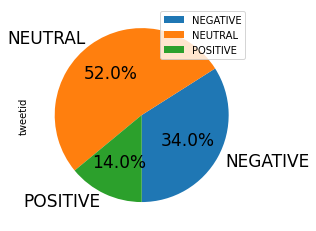

In [69]:
import matplotlib.pyplot as plt

_ = df1_sample_debug.groupby(['Sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)